# Key Factors Influencing Used Vehicle Prices

## Introduction <a id='intro'></a>

As an analyst at Crankshaft List, I was tasked with studying the data we've collected over the past few years. This is a very important step to help companies better understand the factors that influence vehicle prices. By exploring data from the hundreds of vehicle ads we display every day, I hope to uncover valuable insights about the used vehicle market. In this project, I will focus on parameters such as vehicle age, annual mileage, number of cylinders, and condition, and see how the length of the ad affects the price of the vehicle. The hope is that this analysis will provide a deeper understanding of the used vehicle market and provide guidance for smarter decisions in vehicle transactions. I am excited to carry out this project and make a meaningful contribution to the company.

## Table of Contents

* [Introduction](#intro)
* [Import Data and Library](#import)
    * [Import Library](#import_library)
    * [Import Data](#import_data)
    * [Intial Exploration](#ini_explore)
    * [Data Type](#data_type)
    * [Missing Value](#miss_val)
    * [Current Conclusion](#curr_conclu)
* [Pre-Processing](#preprocess)
    * [Handle Missing Value](#handle_miss)
    * [Handle Data Type](#handle_type)
    * [Improve Quality](#improve_quality)
    * [Check Clean Data](#check_clean_data)
* [Understand Core Parameters](#under_core)
    * [Price](#under_core_price)
    * [Vehicle Age](#under_core_age)
    * [Mileage](#under_core_mil)
    * [Number of Cylinders](#under_core_cyl)
    * [Condition](#under_core_con)
* [Handle Outliers](#handle_outlier)
* [Understand Core Parameters Without Outlier](#under_core_clean)
* [Ad Validity Period](#ad_valid_period)
* [Average Price of Each Vehicle Type](#avg_price_type)
* [Price Factor](#price_factors)
    * [SUV Type](#suv_type)
    * [Sedan Type](sed_type)
* [Conclusion](#final_conclu)

## Import Data and Library <a id='import'></a>

### Import Library <a id='import_library'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data <a id='import_data'></a>

In [2]:
data = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/3. Crankshaft List Car Price Analysis/vehicles_us.csv')

### Initial Exploration <a id='ini_explore'></a>

Dataset Contents:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — vehicle mileage when the ad was shown  
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — date the ad was posted
- `days_listed` — number of days the ad was shown until it was removed

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [6]:
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
12323,3350,2002.0,ford f-150,good,8.0,gas,186000.0,automatic,pickup,white,NaN,2019-02-24,49
32822,9995,NaN,toyota corolla,excellent,4.0,gas,82600.0,automatic,sedan,NaN,NaN,2018-09-25,29
14726,10790,2012.0,ford f150,excellent,6.0,gas,182351.0,automatic,pickup,grey,NaN,2018-06-07,2
20309,2500,2015.0,nissan rogue,like new,4.0,gas,80290.0,automatic,SUV,NaN,NaN,2018-06-20,48
7127,13900,2009.0,ram 1500,excellent,8.0,gas,136000.0,automatic,truck,black,1.0,2019-02-26,5
11484,3995,2005.0,chevrolet trailblazer,like new,NaN,gas,106000.0,automatic,SUV,green,1.0,2018-05-19,75
26785,22300,2016.0,chevrolet silverado,like new,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-09,51
24708,14995,2012.0,chevrolet silverado 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-02-06,41
7020,17799,NaN,ford f250 super duty,excellent,8.0,diesel,285326.0,automatic,truck,white,1.0,2019-02-24,69
14346,6000,2006.0,honda odyssey,good,6.0,gas,183378.0,automatic,van,grey,NaN,2018-09-06,29


In this data, there is quite diverse data. The columns available in the data are price, model year, brand, condition, number of cylinders, fuel type, mileage, transmission type, vehicle type, car color, and others.

It can also be found that there are several problems that need to be explored or investigated more deeply and changes may occur at the end. These problems include:
- Lost data 
- Inconsistent data types
- type of categorization

### Data type <a id='data_type'></a>

In [7]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [8]:
data['is_4wd'].unique()

array([ 1., nan])

There is an inappropriate data type in the `is_4wd` column, because the value can use True and False in the boolean type. But before changing the data type, the data must be cleaned first before changing the type.

### Missing Values <a id='miss_val'></a>

In [9]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

From the checking results, there are several missing values ​​in certain columns. The `is_4wd` column has the highest number of missing values ​​with 25,953. Additionally, the 'paint_color' column has a significant number of missing values, with a total of 9,267. The `model_year`, `cylinders`, and `odometer` columns also have some missing values.

### Current Conclusion and Next Steps <a id='curr_conclu'></a>

Based on the initial data, there are several columns that have missing values, and most of the missing data is in the `is_4wd` column. This can affect subsequent analysis if left unchecked.

For the next step, the process of dealing with missing values ​​will be carried out. 

In the `is_4wd` column, empty or missing values ​​will be replaced with the value number 0, and change the column data type to boolean, to simplify analysis. Then in the `paint_color` and `model_year` columns, missing values ​​can be replaced with the `unknown` category so as not to lose the original data that is already in the data.

To deal with missing values ​​in the `odometer` column, the missing values ​​can be considered to be replaced with the middle or average value according to the data distribution.

In the `cylinder` column, although missing data can be replaced by missing values ​​by filling in the average or median value, the missing values ​​can be replaced with `unknown` values ​​because the cylinder value on the vehicle cannot be filled in logically with an average value. average or median.

Once all this has been done, the data will be ready for deeper or further analysis.

## Pre-processing <a id='preprocess'></a>

### Handle Missing Value <a id='handle_miss'></a>

#### Column `is_4wd` <a id='miss_4wd'></a>

In [10]:
data['is_4wd'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9376\1219286601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['is_4wd'].fillna(0, inplace=True)


#### Column `paint_color` <a id='miss_paint'></a>

In [11]:
data['paint_color'].fillna('unknown', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9376\703949175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['paint_color'].fillna('unknown', inplace=True)


#### Column `odometer` <a id='miss_odo'></a>

<Axes: title={'center': 'Distribusi Odometer'}, ylabel='Frequency'>

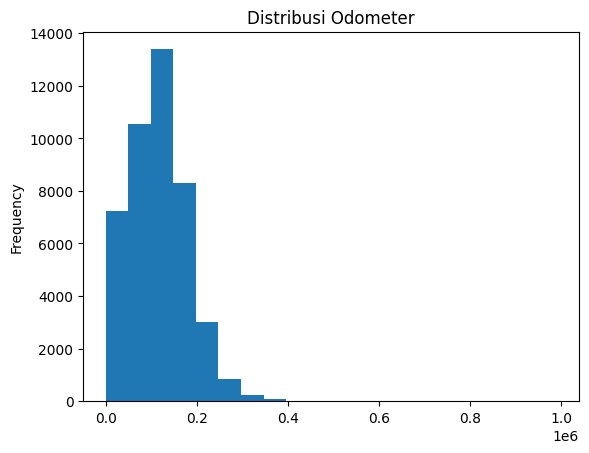

In [12]:
data['odometer'].plot(kind='hist', bins=20, title='Distribusi Odometer')

In [13]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

From the histogram image and statistical data in the `odometer` column, the shape of the histogram can be said to be positively skewed or right-skewed from the mean value which is greater than the median value, and the minimum value which is significantly different from the median value. Therefore, filling in missing values ​​would be more appropriate using median values. If charging uses average values, extreme values ​​in the data may be affected.

In [14]:
median_odometer = data['odometer'].median()
data['odometer'].fillna(median_odometer, inplace=True)

#### Column `cylinders` <a id='miss_cyl'></a>

<Axes: title={'center': 'Distribusi Cylinder'}, ylabel='Frequency'>

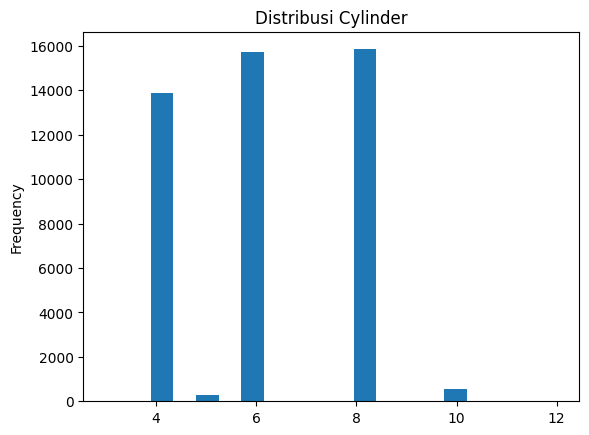

In [15]:
data['cylinders'].plot(kind='hist', bins=20, title='Distribusi Cylinder')

In [16]:
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

From the results of the statistical data above, missing values ​​can be filled in with median values. This is because the median value is more resistant to the effects of outlier values ​​and is more suitable for data that is not normally distributed.

In [17]:
cylinder_median = data['cylinders'].median()
data['cylinders'].fillna(cylinder_median, inplace=True)

#### Column `model_year` <a id='miss_modyear'></a>

<Axes: title={'center': 'Distribusi Model Year'}, ylabel='Frequency'>

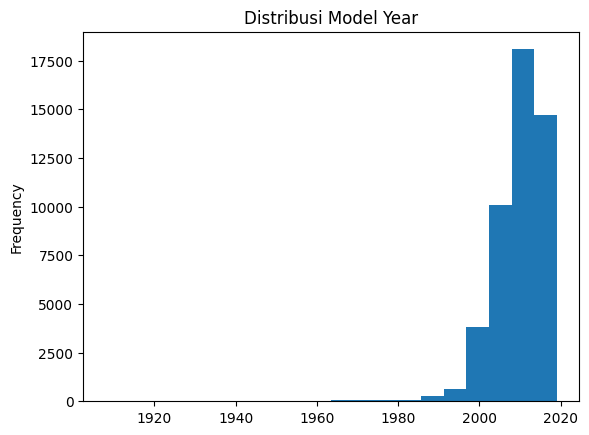

In [18]:
data['model_year'].plot(kind='hist', bins=20, title='Distribusi Model Year')

In [19]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

From the statistical data above, the `model_year` column is more suitable for using the median value rather than the average. By using median values, characteristic values ​​can be maintained and not shifted by more years.

In [20]:
median_model_year = data['model_year'].median()
data['model_year'].fillna(median_model_year, inplace=True)

#### Recheck Missing Values <a id='recheck_miss'></a>

In [21]:
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Handle Data Type <a id='handle_type'></a>

In [22]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

#### Column `is_4wd` Type becomes Boolean <a id='handle_type_bool'></a>

In [23]:
data['is_4wd'] = data['is_4wd'].astype(bool)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


#### Column `date_posted` Type becomes Datetime <a id='handle_type_datetime'></a>

In [25]:
data['date_posted'] = pd.to_datetime(data['date_posted'])

#### Columns `model_year` and `cylinders` Types becomes Integer <a id='handle_type_int'></a>

In [26]:
data['model_year'] = data['model_year'].astype(int)

In [27]:
data['cylinders'] = data['cylinders'].astype(int)

#### Column `price` Type becomes float <a id='handle_type_float'></a>

In [28]:
data['price'] = data['price'].astype(float)

#### Recheck Data Types <a id='handle_type_check'></a>

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 4.4+ MB


All data types have been changed according to analysis needs

### Improve Data Quality <a id='improve_quality'></a>

Add the time and date values ​​for when the ad was displayed

In [30]:
data['date_posted'] = pd.to_datetime(data['date_posted'])
data['posting_date'] = data['date_posted'].dt.date
data['posting_time'] = data['date_posted'].dt.time

Add the age of the vehicle when the ad is shown

In [31]:
data['year_posted'] = data['date_posted'].dt.year
data['vehicle_age'] = data['year_posted'] - data['model_year'] + 1

Add the average vehicle mileage per year

In [32]:
data['average_annual_mileage'] = data['odometer'] / data['vehicle_age']

Replace the value in the 'condition' column with something that can be manipulated more easily

In [33]:
condition_mapping = {'new': 1, 'like new': 2, 'excellent': 3, 'good': 4, 'fair': 5, 'salvage': 6}
data['condition'] = data['condition'].map(condition_mapping)

### Checking Clean Data <a id='check_clean_data'></a>

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   51525 non-null  float64       
 1   model_year              51525 non-null  int32         
 2   model                   51525 non-null  object        
 3   condition               51525 non-null  int64         
 4   cylinders               51525 non-null  int32         
 5   fuel                    51525 non-null  object        
 6   odometer                51525 non-null  float64       
 7   transmission            51525 non-null  object        
 8   type                    51525 non-null  object        
 9   paint_color             51525 non-null  object        
 10  is_4wd                  51525 non-null  bool          
 11  date_posted             51525 non-null  datetime64[ns]
 12  days_listed             51525 non-null  int64 

In [35]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posting_date,posting_time,year_posted,vehicle_age,average_annual_mileage
0,9400.0,2011,bmw x5,4,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,00:00:00,2018,8,18125.000000
1,25500.0,2011,ford f-150,4,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018-10-19,00:00:00,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,2,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019-02-07,00:00:00,2019,7,15714.285714
3,1500.0,2003,ford f-150,5,8,gas,113000.0,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,00:00:00,2019,17,6647.058824
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019-04-02,00:00:00,2019,3,26967.666667


In [36]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posting_date,posting_time,year_posted,vehicle_age,average_annual_mileage
51520,9249.0,2013,nissan maxima,2,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2018-10-03,00:00:00,2018,6,14689.333333
51521,2700.0,2002,honda civic,6,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2018-11-14,00:00:00,2018,17,10676.470588
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2018-11-15,00:00:00,2018,10,12800.000000
51523,7455.0,2013,toyota corolla,4,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2018-07-02,00:00:00,2018,6,23262.166667
51524,6300.0,2014,nissan altima,4,4,gas,113000.0,automatic,sedan,unknown,False,2018-06-05,10,2018-06-05,00:00:00,2018,5,22600.000000


In [37]:
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posting_date,posting_time,year_posted,vehicle_age,average_annual_mileage
27368,15995.0,2013,ram 1500,3,8,gas,127000.0,automatic,pickup,silver,True,2018-12-12,18,2018-12-12,00:00:00,2018,6,21166.666667
51241,8999.0,2014,hyundai sonata,2,4,gas,55628.0,automatic,sedan,red,False,2019-01-14,8,2019-01-14,00:00:00,2019,6,9271.333333
42926,5500.0,2010,nissan altima,4,4,gas,144000.0,automatic,sedan,white,False,2018-12-23,23,2018-12-23,00:00:00,2018,9,16000.000000
41103,17000.0,2005,ram 2500,4,6,diesel,218000.0,manual,truck,white,True,2019-04-03,134,2019-04-03,00:00:00,2019,15,14533.333333
9632,6500.0,2015,kia soul,4,4,gas,130000.0,automatic,sedan,silver,False,2019-01-18,31,2019-01-18,00:00:00,2019,5,26000.000000
50890,9995.0,2006,ford ranger,3,6,gas,51991.0,automatic,pickup,white,False,2018-10-26,20,2018-10-26,00:00:00,2018,13,3999.307692
34843,17500.0,1966,ford mustang,4,4,gas,69280.0,automatic,coupe,white,False,2019-04-15,20,2019-04-15,00:00:00,2019,54,1282.962963
34439,6495.0,2005,toyota camry,3,6,gas,72173.0,automatic,sedan,silver,False,2018-09-19,22,2018-09-19,00:00:00,2018,14,5155.214286
26704,19990.0,2012,ford f-250 sd,4,8,gas,81207.0,automatic,truck,custom,True,2018-09-20,64,2018-09-20,00:00:00,2018,7,11601.000000
6735,3500.0,2011,honda civic lx,3,4,gas,172000.0,automatic,sedan,blue,False,2018-09-04,11,2018-09-04,00:00:00,2018,8,21500.000000


## Understand Core Parameters <a id='under_core'></a>

- Price
- Vehicle Age
- Mileage
- Number of Cylinders 
- Condition

### Price <a id='under_core_price'></a>

<Axes: title={'center': 'Vehicle Price Distribution'}, ylabel='Frequency'>

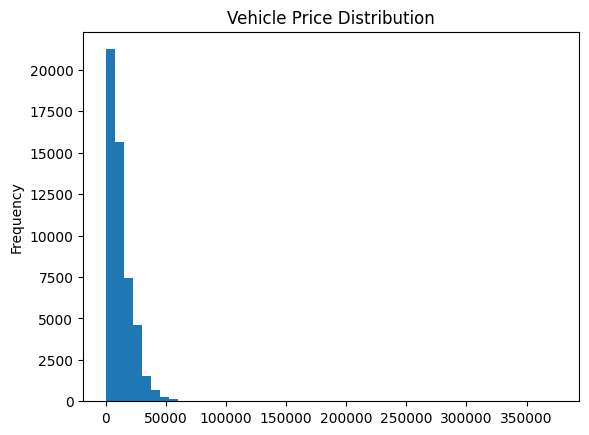

In [38]:
data['price'].plot(kind='hist', bins=50, title='Vehicle Price Distribution')

In [39]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

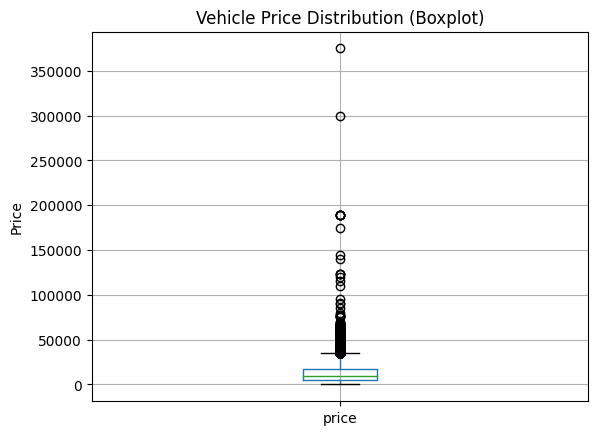

In [40]:
data.boxplot(column='price')
plt.title('Vehicle Price Distribution (Boxplot)')
plt.ylabel('Price')
plt.show()

A significant variation can be seen around the mean value, which is around 12,132.46. There is also a very low minimum value of 1, which could indicate an incorrect value was input. In the histogram above, the distribution of the `price` column tends to be skewed to the right, with the maximum value far exceeding the median value.

To overcome very low values, you can first investigate whether this is an anomaly or an input error. If this is an anomaly, then the value can be removed or replaced by another value such as median or mean. 
Extreme data in this data makes the distribution less effective. Therefore, addressing outliers may be considered to overcome this.

### Vehicle Age <a id='under_core_age'></a>

<Axes: title={'center': 'Vehicle Age Distribution'}, ylabel='Frequency'>

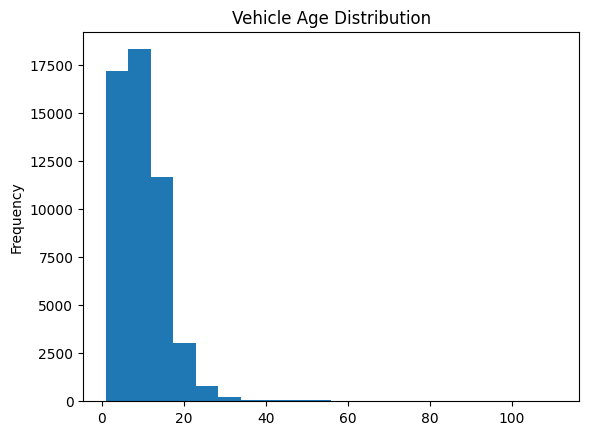

In [41]:
data['vehicle_age'].plot(kind='hist', bins=20, title='Vehicle Age Distribution')

In [42]:
data['vehicle_age'].describe()

count    51525.000000
mean         9.469229
std          6.079773
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: vehicle_age, dtype: float64

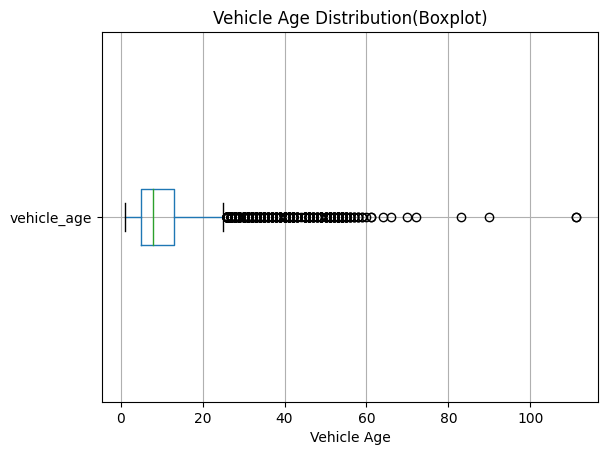

In [43]:
data.boxplot(column='vehicle_age', vert=False)
plt.title('Vehicle Age Distribution(Boxplot)')
plt.xlabel('Vehicle Age')
plt.show()

In the data above, there is quite a large variation compared to the average age of the vehicle, which is around 9.47 years. There is also a very low value, namely 1 year. The vehicle age distribution also has a significant range with the highest value being 111 years.

### Mileage <a id='under_core_mil'></a>

<Axes: title={'center': 'Distribution of Average Annual Vehicle Mileage'}, ylabel='Frequency'>

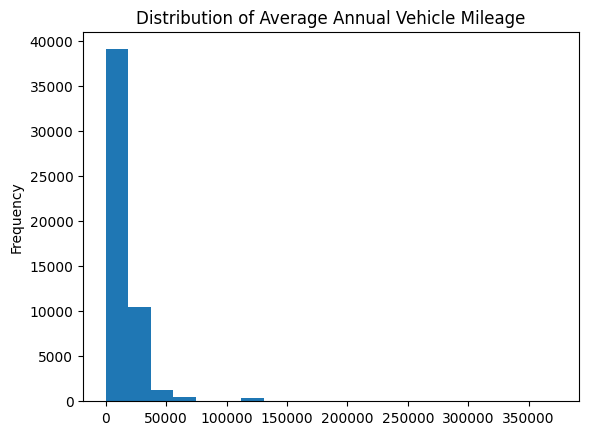

In [44]:
data['average_annual_mileage'].plot(kind='hist', bins=20, title='Distribution of Average Annual Vehicle Mileage')

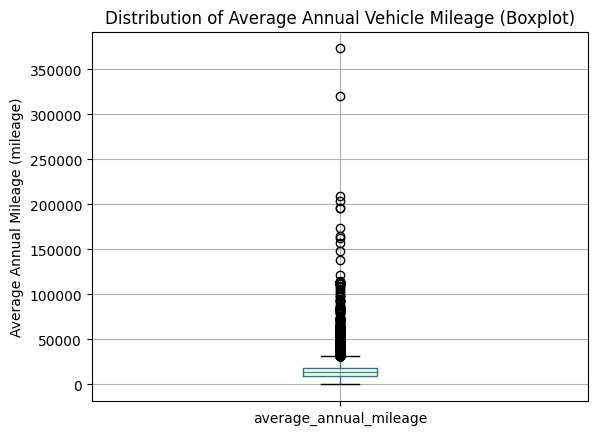

In [46]:
data.boxplot(column='average_annual_mileage')
plt.title('Distribution of Average Annual Vehicle Mileage (Boxplot)')
plt.ylabel('Average Annual Mileage (mileage)')
plt.show()

In [47]:
data['average_annual_mileage'].describe()

count     51525.000000
mean      15537.649192
std       12341.655297
min           0.000000
25%        9411.764706
50%       13214.444444
75%       18394.500000
max      373200.000000
Name: average_annual_mileage, dtype: float64

In the data results above, there is a significant difference between the median value and the average value. This can show that there are outlier values, values ​​that are very high and affect the average value. There are a number of outliers that can be seen in the maximum value of 373200 compared to the Q3 value of 18394.

### Number of Cylinders <a id='under_core_cyl'></a>

In [48]:
data['cylinders'].value_counts()

cylinders
6     20960
8     15844
4     13864
10      549
5       272
3        34
12        2
Name: count, dtype: int64

In [49]:
data['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

<Axes: title={'center': 'Vehicle Cylinder Distribution'}, ylabel='Frequency'>

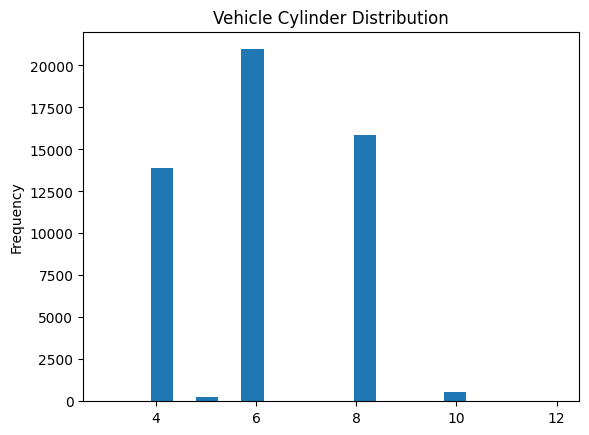

In [50]:
data['cylinders'].plot(kind='hist', bins=20, title='Vehicle Cylinder Distribution')

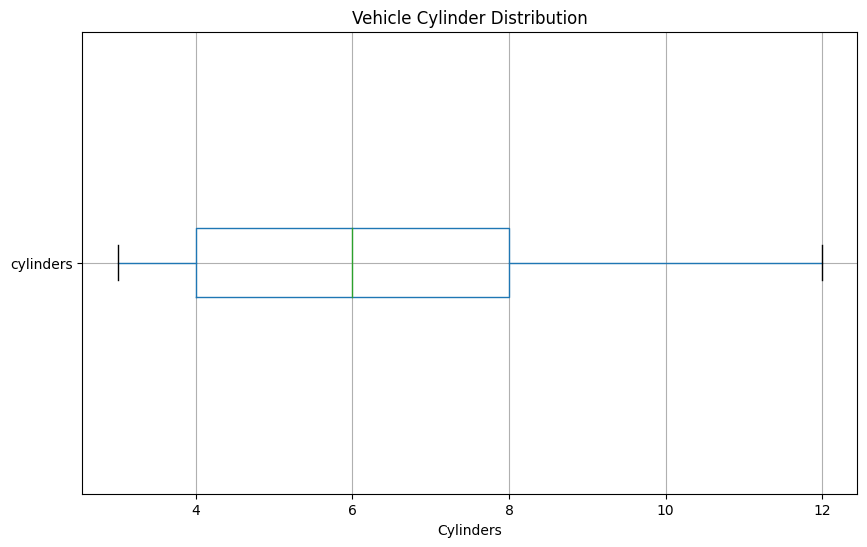

In [51]:
plt.figure(figsize=(10, 6))
data.boxplot(column='cylinders', vert=False)
plt.title('Vehicle Cylinder Distribution')
plt.xlabel('Cylinders')
plt.show()

In [52]:
data['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In this column, most vehicles have 4 to 8 cylinders. and the most common is the 6 cylinder value.

### Condition <a id='under_core_con'></a>

In [53]:
data['condition'].value_counts()

condition
3    24773
4    20145
2     4742
5     1607
1      143
6      115
Name: count, dtype: int64

<Axes: title={'center': 'Condition Histogram'}, xlabel='condition'>

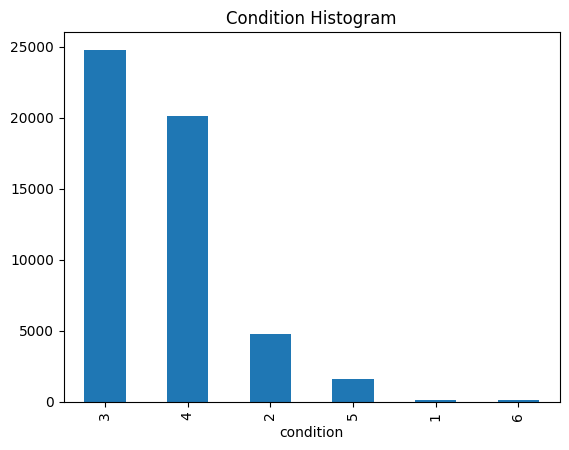

In [54]:
data['condition'].value_counts().plot(kind='bar', title='Condition Histogram')

<Axes: title={'center': 'Condition Box Plot'}>

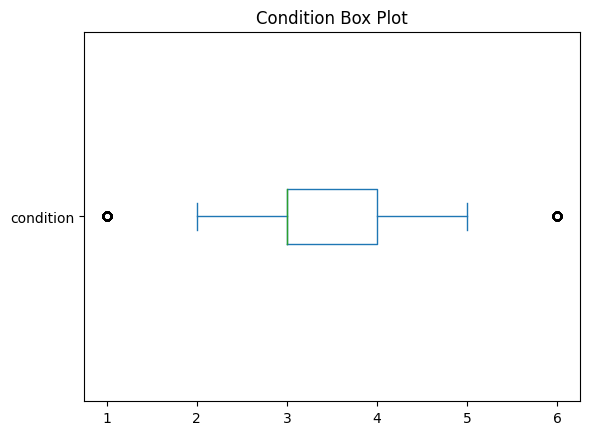

In [55]:
data['condition'].plot(kind='box', vert=False, title='Condition Box Plot')


In [56]:
data['condition'].describe()

count    51525.000000
mean         3.362465
std          0.712447
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: condition, dtype: float64

Most of the conditions on the vehicles in the data fall into the good to fair condition category. This can be seen by low standard deviation values, little variation in conditions.

## Handle Outliers <a id='handle_outlier'></a>

In [57]:
def upper_lower_whisker(series):
    Q1  = series.quantile(.25)
    Q3  = series.quantile(.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

In [58]:
def outlier_cleansing(dataframe, column):
    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'Lower whisker values: {lower}')
    print(f'Upper whisker values: {upper}')

    plt.title(f'Before cleaning outlier in {column} column')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'Lower whisker values after cleaning: {lower_check}')
    print(f'Upper whisker values after cleaning: {upper_check}')

    plt.title(f'After cleaning outlier in {column} column')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] Outliers in [{column}] column have been cleared! ======\n')
        return dataframe
    else:
        print(f'\n------ [RE-START] Cleaning outliers in {column} column ------\n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe

In [59]:
df_final = data.copy()
list_of_selected_column = ['price','condition', 'cylinders',
                          'vehicle_age', 'average_annual_mileage']


====== [START] Cleaning outliers in price column ======

Lower whisker values: -12758.5
Upper whisker values: 34597.5


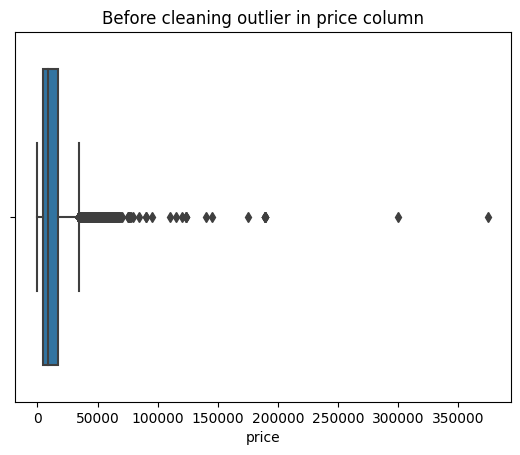

Lower whisker values after cleaning: -11362.5
Upper whisker values after cleaning: 32257.5


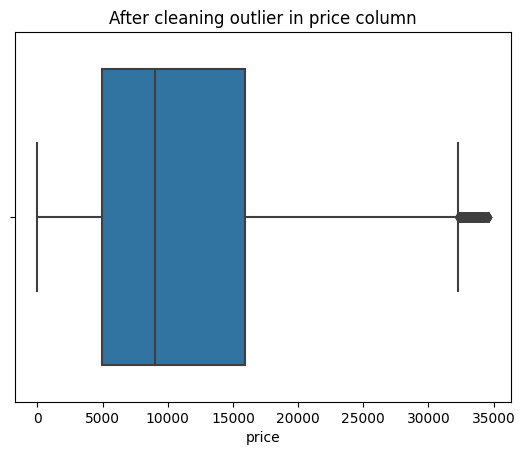


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -11362.5
Upper whisker values: 32257.5


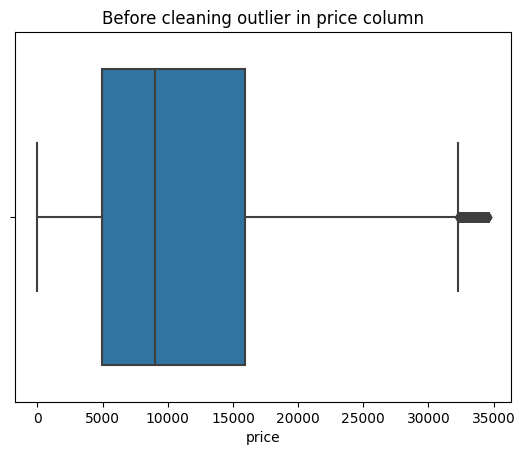

Lower whisker values after cleaning: -10762.5
Upper whisker values after cleaning: 31257.5


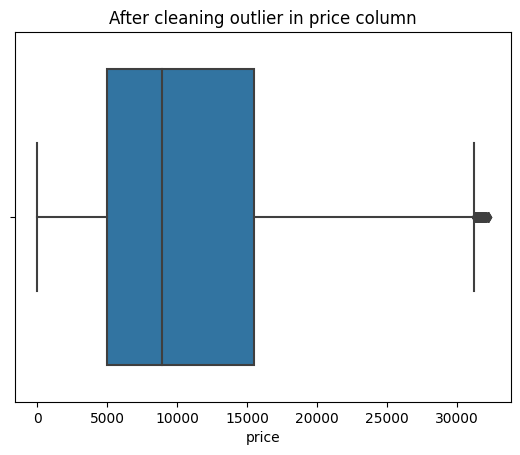


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -10762.5
Upper whisker values: 31257.5


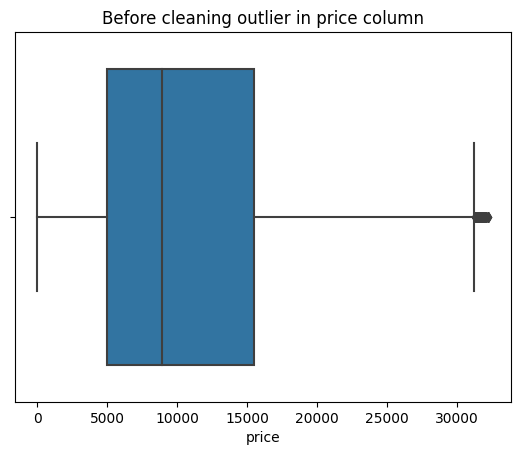

Lower whisker values after cleaning: -10012.5
Upper whisker values after cleaning: 30007.5


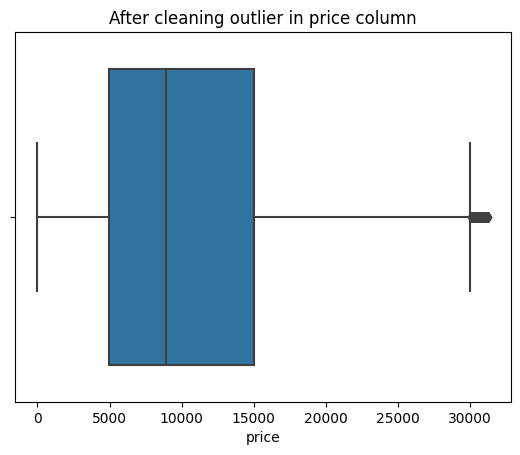


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -10012.5
Upper whisker values: 30007.5


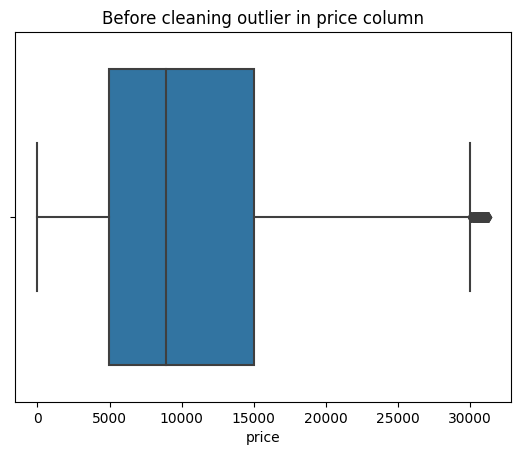

Lower whisker values after cleaning: -10011.0
Upper whisker values after cleaning: 30005.0


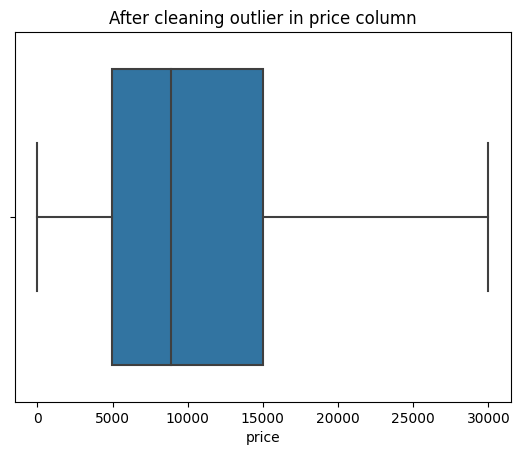


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -10011.0
Upper whisker values: 30005.0


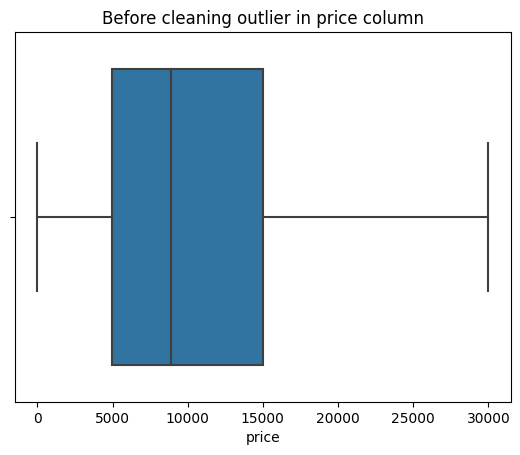

Lower whisker values after cleaning: -10011.0
Upper whisker values after cleaning: 30005.0


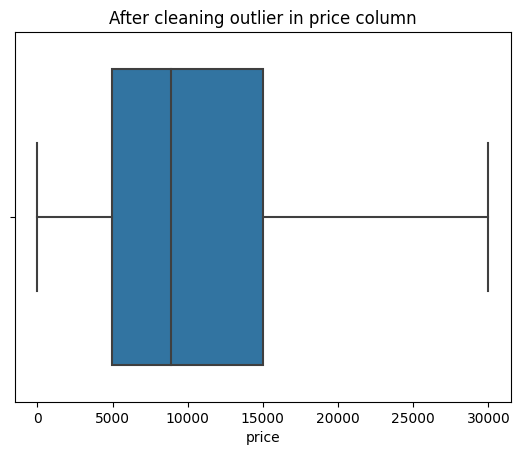


====== [FINISHED] Outliers in [price] column have been cleared! ======


====== [START] Cleaning outliers in condition column ======

Lower whisker values: 1.5
Upper whisker values: 5.5


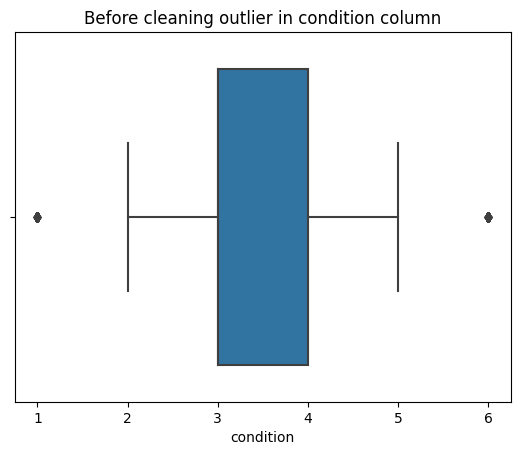

Lower whisker values after cleaning: 1.5
Upper whisker values after cleaning: 5.5


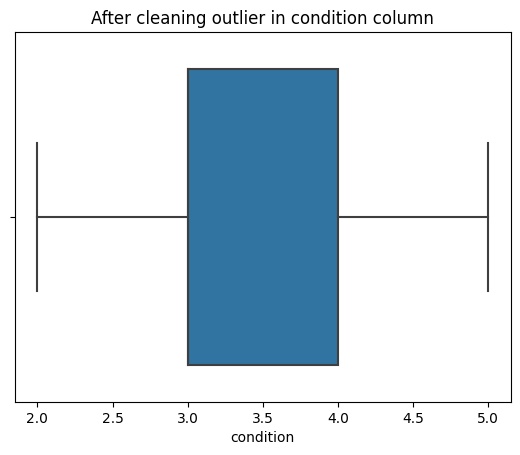


====== [FINISHED] Outliers in [condition] column have been cleared! ======


====== [START] Cleaning outliers in cylinders column ======

Lower whisker values: -2.0
Upper whisker values: 14.0


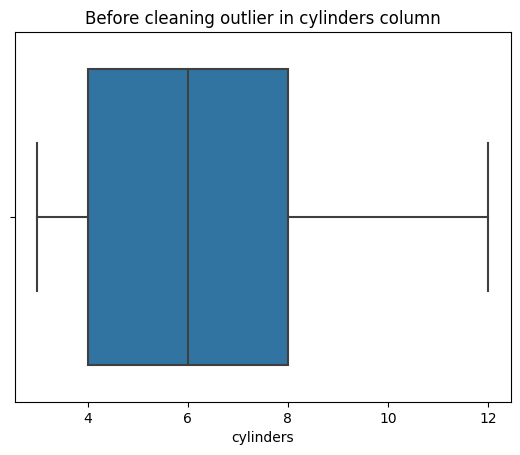

Lower whisker values after cleaning: -2.0
Upper whisker values after cleaning: 14.0


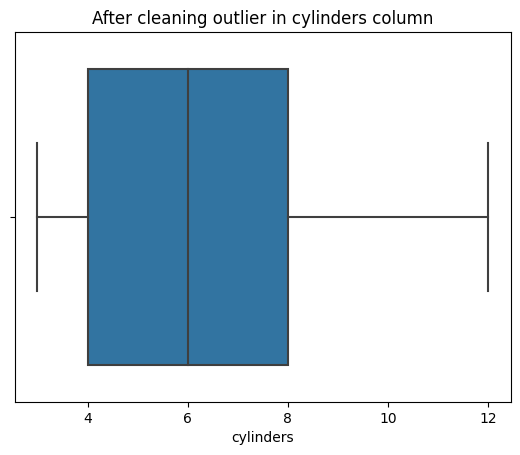


====== [FINISHED] Outliers in [cylinders] column have been cleared! ======


====== [START] Cleaning outliers in vehicle_age column ======

Lower whisker values: -4.5
Upper whisker values: 23.5


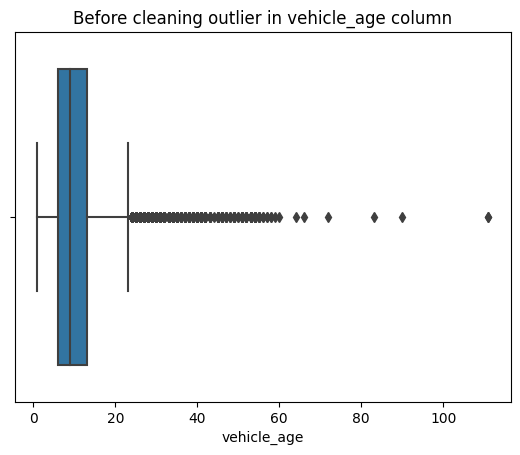

Lower whisker values after cleaning: -4.5
Upper whisker values after cleaning: 23.5


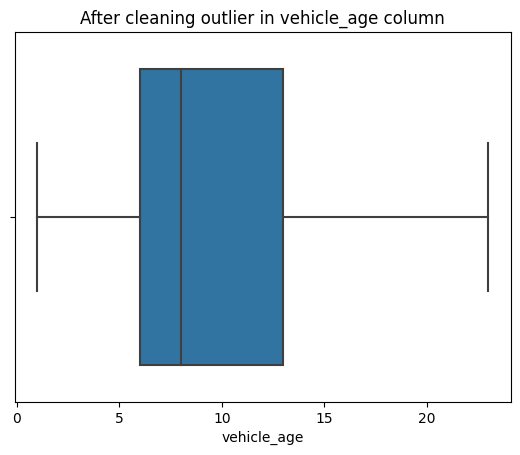


====== [FINISHED] Outliers in [vehicle_age] column have been cleared! ======


====== [START] Cleaning outliers in average_annual_mileage column ======

Lower whisker values: -3560.479166666666
Upper whisker values: 31356.354166666668


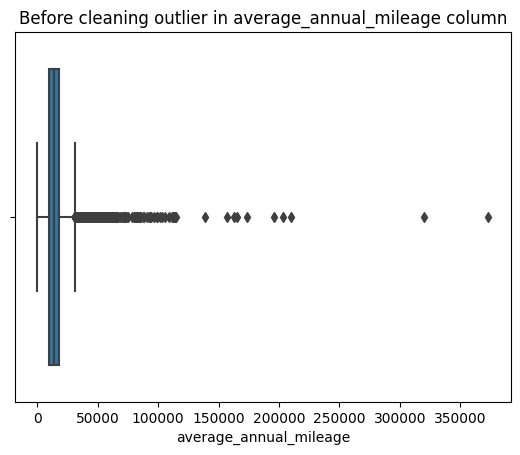

Lower whisker values after cleaning: -2148.833333333334
Upper whisker values after cleaning: 28692.5


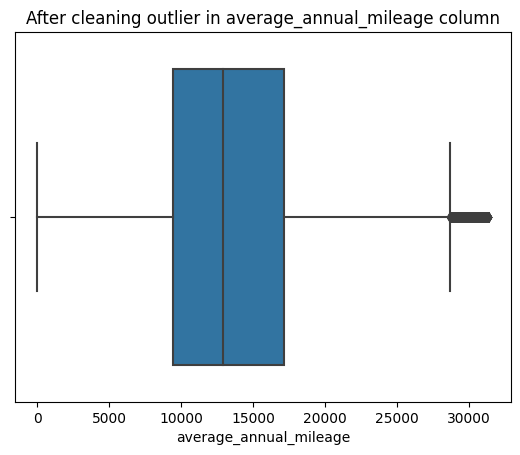


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -2148.833333333334
Upper whisker values: 28692.5


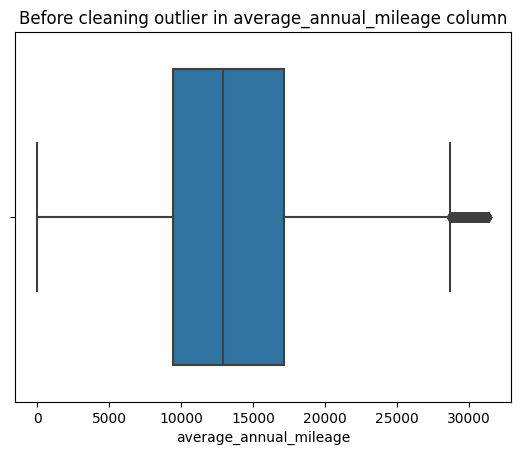

Lower whisker values after cleaning: -1813.2187499999964
Upper whisker values after cleaning: 28072.69791666666


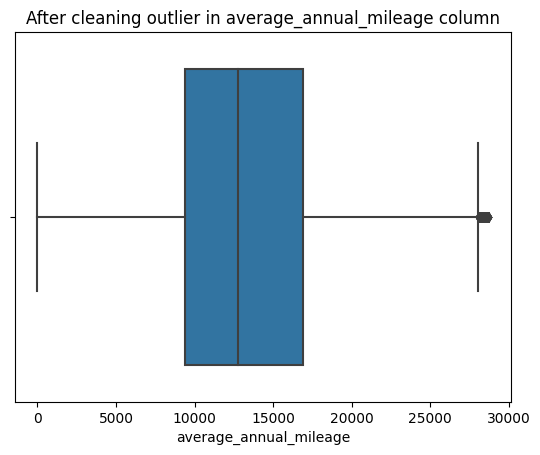


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1813.2187499999964
Upper whisker values: 28072.69791666666


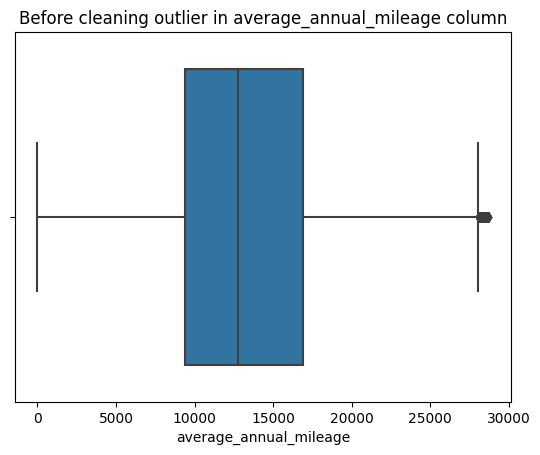

Lower whisker values after cleaning: -1631.6163003662969
Upper whisker values after cleaning: 27609.890415140413


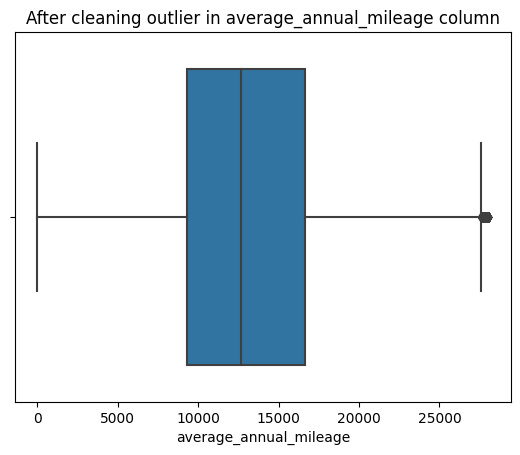


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1631.6163003662969
Upper whisker values: 27609.890415140413


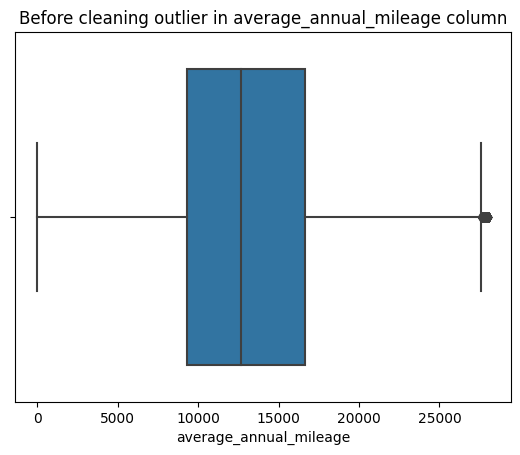

Lower whisker values after cleaning: -1558.0791666666682
Upper whisker values after cleaning: 27485.687500000004


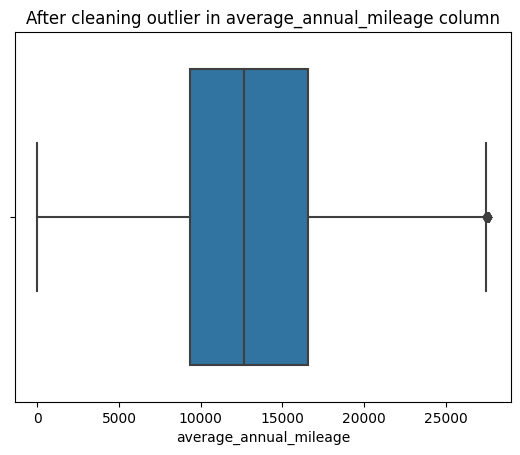


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1558.0791666666682
Upper whisker values: 27485.687500000004


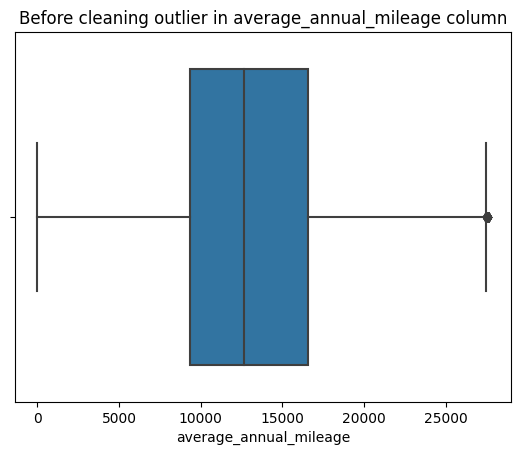

Lower whisker values after cleaning: -1532.7685439560428
Upper whisker values after cleaning: 27419.803983516482


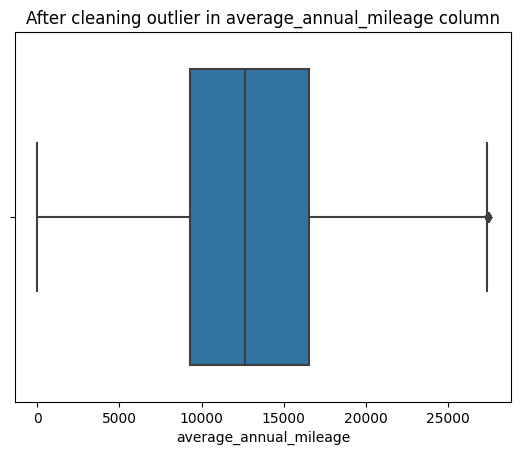


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1532.7685439560428
Upper whisker values: 27419.803983516482


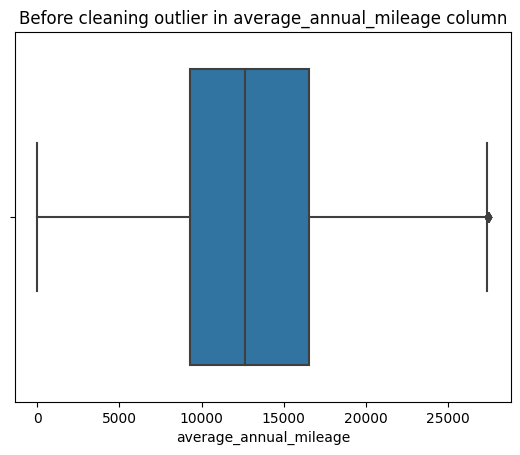

Lower whisker values after cleaning: -1528.6093749999982
Upper whisker values after cleaning: 27412.615625


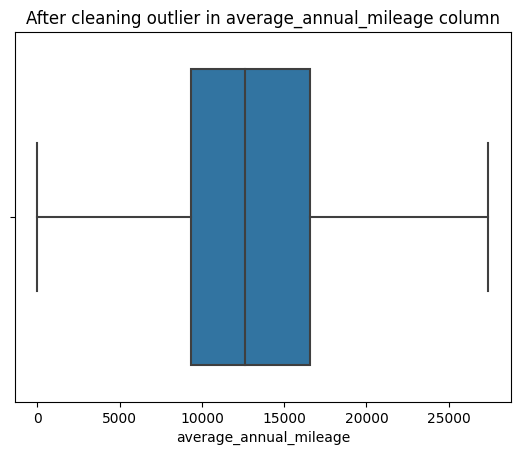


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1528.6093749999982
Upper whisker values: 27412.615625


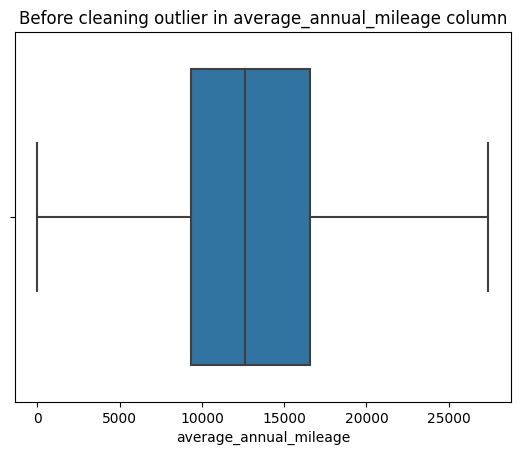

Lower whisker values after cleaning: -1528.6093749999982
Upper whisker values after cleaning: 27412.615625


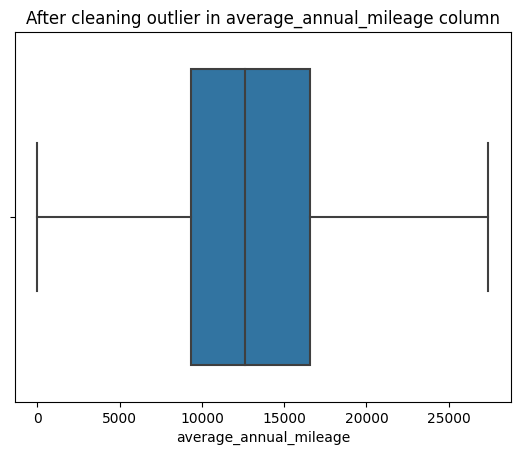


====== [FINISHED] Outliers in [average_annual_mileage] column have been cleared! ======



In [60]:
for column in list_of_selected_column:
    print(f'\n====== [START] Cleaning outliers in {column} column ======\n')
    df_final = outlier_cleansing(dataframe=df_final, column=column)


====== [START] Cleaning outliers in price column ======

Lower whisker values: -12758.5
Upper whisker values: 34597.5


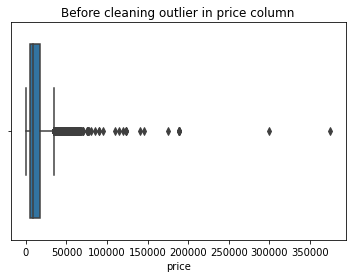

Lower whisker values after cleaning: -11362.5
Upper whisker values after cleaning: 32257.5


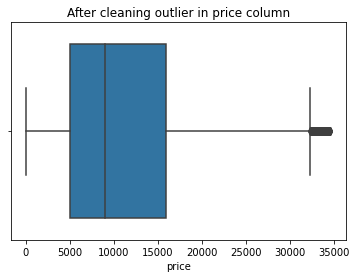


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -11362.5
Upper whisker values: 32257.5


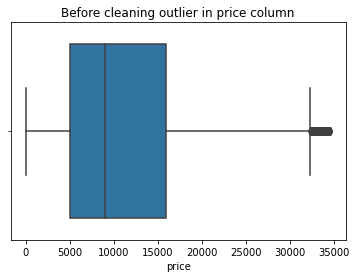

Lower whisker values after cleaning: -10762.5
Upper whisker values after cleaning: 31257.5


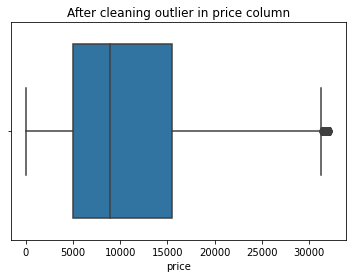


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -10762.5
Upper whisker values: 31257.5


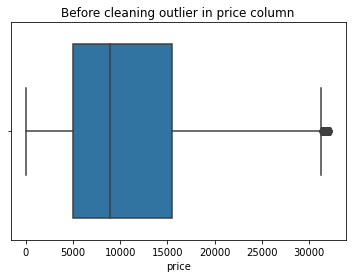

Lower whisker values after cleaning: -10012.5
Upper whisker values after cleaning: 30007.5


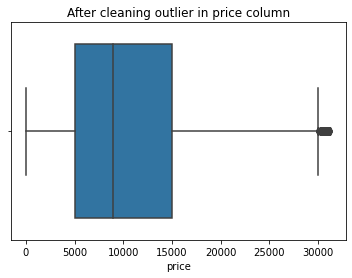


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -10012.5
Upper whisker values: 30007.5


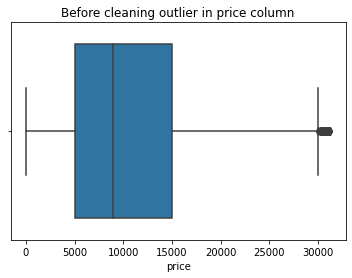

Lower whisker values after cleaning: -10011.0
Upper whisker values after cleaning: 30005.0


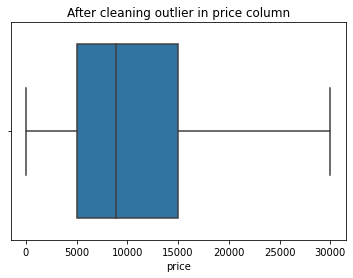


------ [RE-START] Cleaning outliers in price column ------

Lower whisker values: -10011.0
Upper whisker values: 30005.0


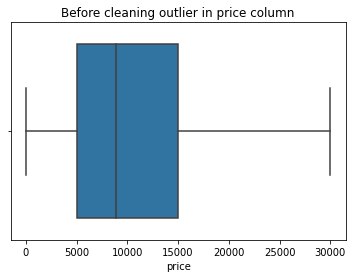

Lower whisker values after cleaning: -10011.0
Upper whisker values after cleaning: 30005.0


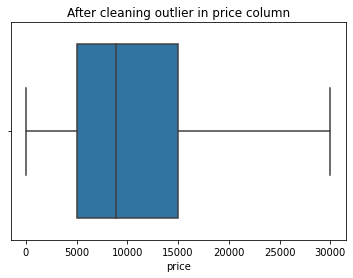


====== [FINISHED] Outliers in [price] column have been cleared! ======


====== [START] Cleaning outliers in condition column ======

Lower whisker values: 1.5
Upper whisker values: 5.5


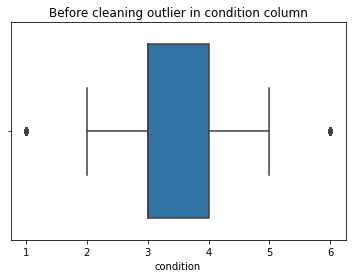

Lower whisker values after cleaning: 1.5
Upper whisker values after cleaning: 5.5


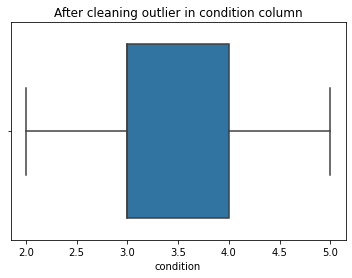


====== [FINISHED] Outliers in [condition] column have been cleared! ======


====== [START] Cleaning outliers in cylinders column ======

Lower whisker values: -2.0
Upper whisker values: 14.0


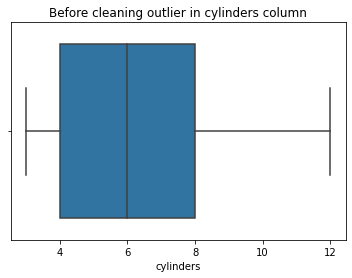

Lower whisker values after cleaning: -2.0
Upper whisker values after cleaning: 14.0


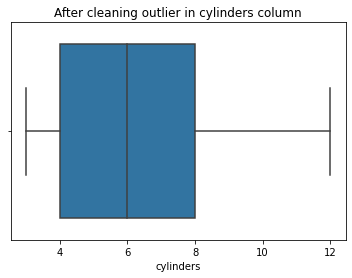


====== [FINISHED] Outliers in [cylinders] column have been cleared! ======


====== [START] Cleaning outliers in vehicle_age column ======

Lower whisker values: -4.5
Upper whisker values: 23.5


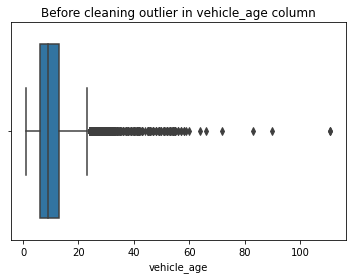

Lower whisker values after cleaning: -4.5
Upper whisker values after cleaning: 23.5


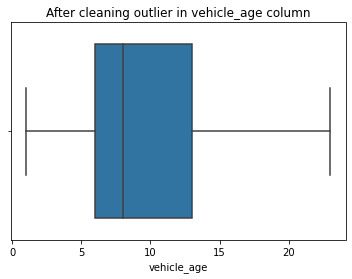


====== [FINISHED] Outliers in [vehicle_age] column have been cleared! ======


====== [START] Cleaning outliers in average_annual_mileage column ======

Lower whisker values: -3560.479166666666
Upper whisker values: 31356.354166666668


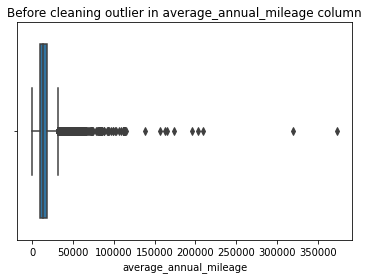

Lower whisker values after cleaning: -2148.833333333334
Upper whisker values after cleaning: 28692.5


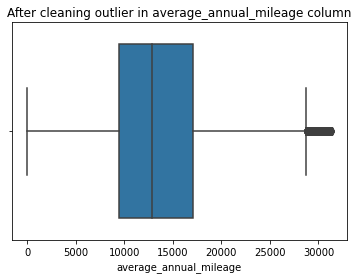


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -2148.833333333334
Upper whisker values: 28692.5


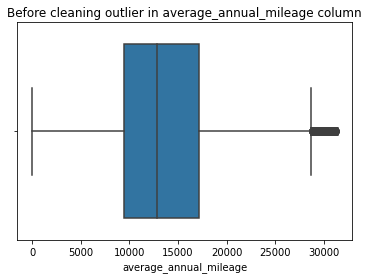

Lower whisker values after cleaning: -1813.2187499999964
Upper whisker values after cleaning: 28072.69791666666


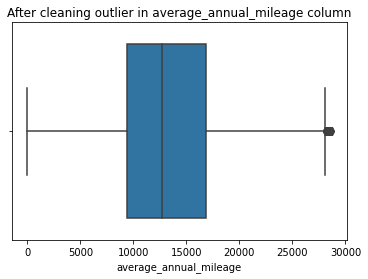


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1813.2187499999964
Upper whisker values: 28072.69791666666


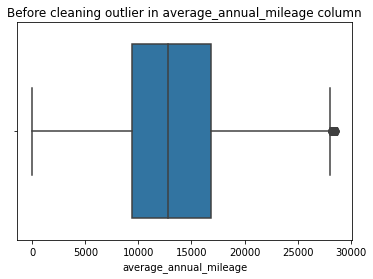

Lower whisker values after cleaning: -1631.6163003662969
Upper whisker values after cleaning: 27609.890415140413


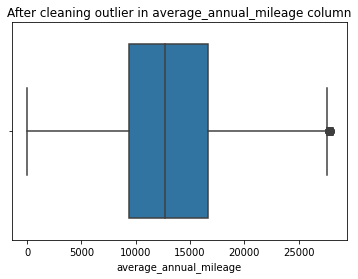


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1631.6163003662969
Upper whisker values: 27609.890415140413


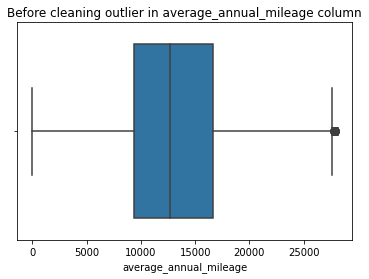

Lower whisker values after cleaning: -1558.0791666666682
Upper whisker values after cleaning: 27485.687500000004


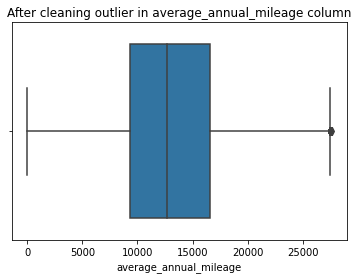


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1558.0791666666682
Upper whisker values: 27485.687500000004


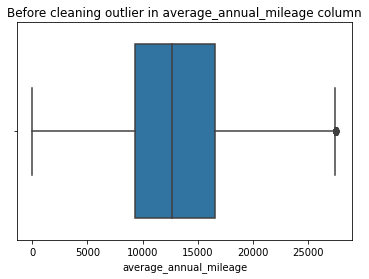

Lower whisker values after cleaning: -1532.7685439560428
Upper whisker values after cleaning: 27419.803983516482


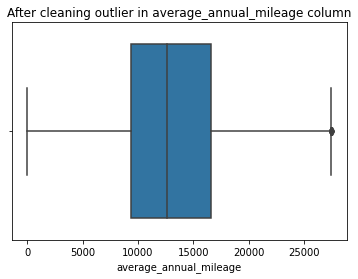


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1532.7685439560428
Upper whisker values: 27419.803983516482


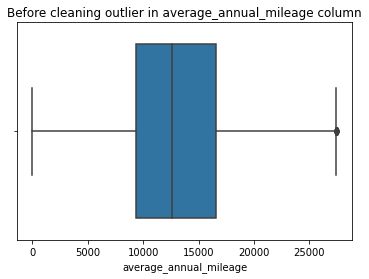

Lower whisker values after cleaning: -1528.6093749999982
Upper whisker values after cleaning: 27412.615625


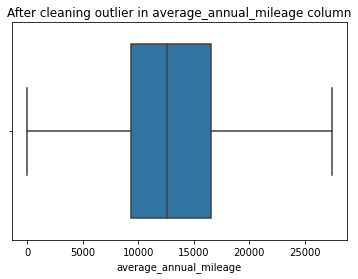


------ [RE-START] Cleaning outliers in average_annual_mileage column ------

Lower whisker values: -1528.6093749999982
Upper whisker values: 27412.615625


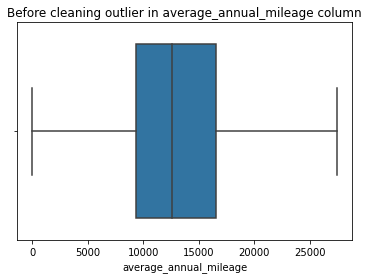

Lower whisker values after cleaning: -1528.6093749999982
Upper whisker values after cleaning: 27412.615625


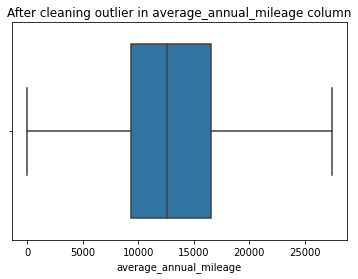


====== [FINISHED] Outliers in [average_annual_mileage] column have been cleared! ======



In [59]:
def upper_lower_whisker(series):
    Q1  = series.quantile(.25)
    Q3  = series.quantile(.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

def outlier_cleansing(dataframe, column):
    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'Lower whisker values: {lower}')
    print(f'Upper whisker values: {upper}')

    plt.title(f'Before cleaning outlier in {column} column')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'Lower whisker values after cleaning: {lower_check}')
    print(f'Upper whisker values after cleaning: {upper_check}')

    plt.title(f'After cleaning outlier in {column} column')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] Outliers in [{column}] column have been cleared! ======\n')
        return dataframe
    else:
        print(f'\n------ [RE-START] Cleaning outliers in {column} column ------\n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe

df_final = data.copy()
list_of_selected_column = ['price','condition', 'cylinders',
                          'vehicle_age', 'average_annual_mileage']

for column in list_of_selected_column:
    print(f'\n====== [START] Cleaning outliers in {column} column ======\n')
    df_final = outlier_cleansing(dataframe=df_final, column=column)

## Understand Core Parameters Without Outliers <a id='under_core_clean'></a>

In [61]:
def plot_new(data, column, plot_type='hist'):
    if plot_type == 'hist':
        plt.figure(figsize=(8, 6))
        data[column].plot(kind='hist', bins=20)
        plt.title(f'Histogram of {column}')
    elif plot_type == 'box':
        plt.figure(figsize=(8, 6))
        data.boxplot(column=column)
        plt.title(f'Boxplot of {column}')
    else:
        print("Jenis plot tidak valid. Gunakan 'hist' atau 'box'.")

    plt.xlabel(column)
    plt.show()

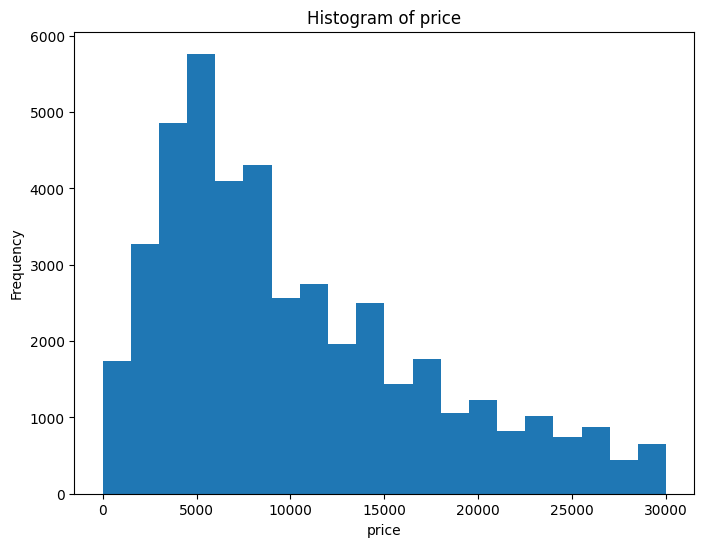

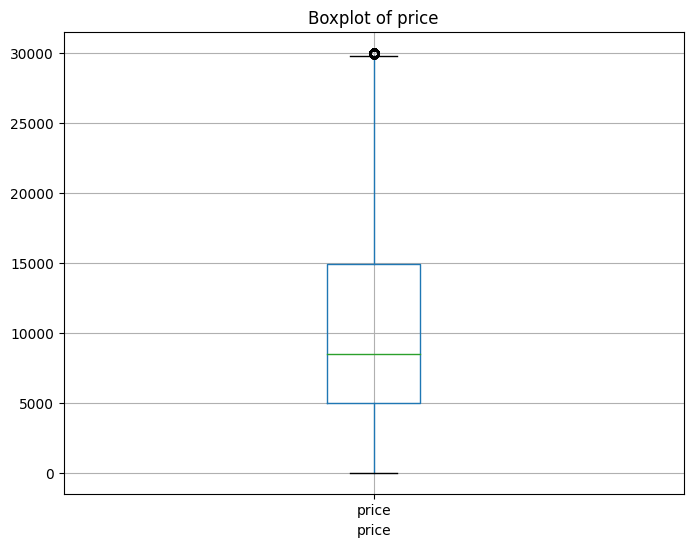

In [62]:
plot_new(df_final, 'price', 'hist')
plot_new(df_final, 'price', 'box')

In [67]:
df_final['price'].describe()

count    43864.000000
mean     10392.360843
std       7106.488092
min          1.000000
25%       4950.000000
50%       8495.000000
75%      14900.000000
max      30000.000000
Name: price, dtype: float64

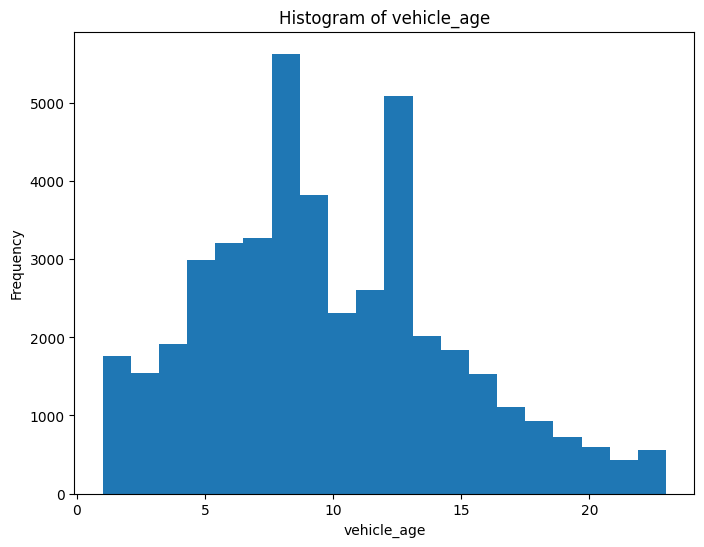

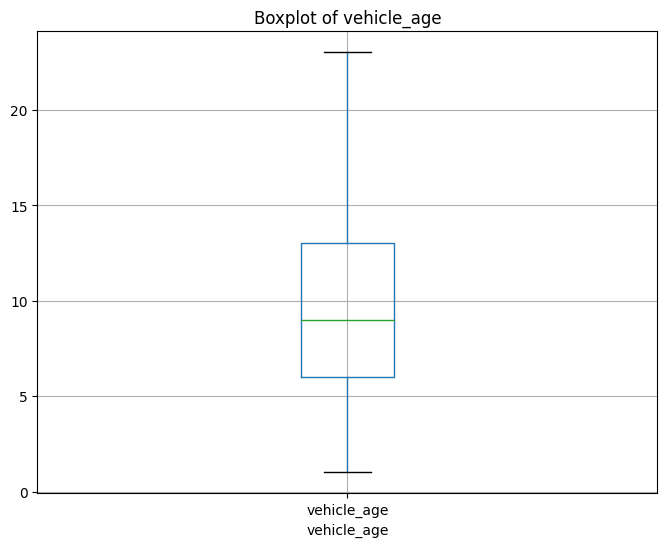

In [63]:
plot_new(df_final, 'vehicle_age', 'hist')
plot_new(df_final, 'vehicle_age', 'box')

In [68]:
df_final['vehicle_age'].describe()

count    43864.000000
mean         9.801386
std          4.748701
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         23.000000
Name: vehicle_age, dtype: float64

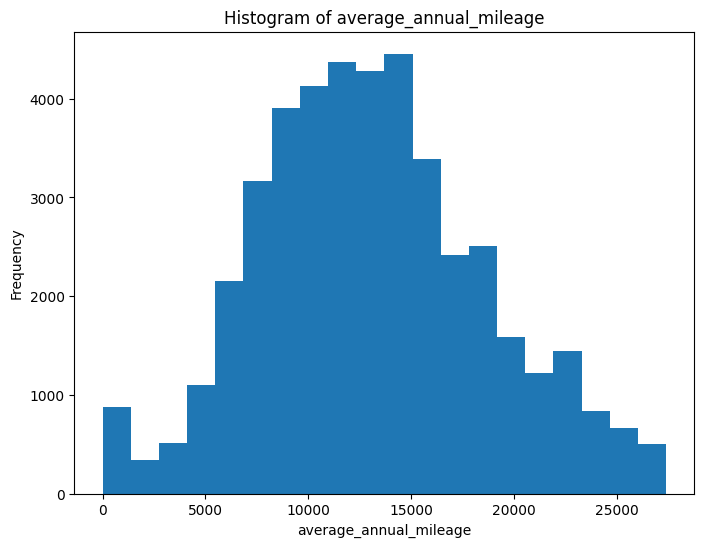

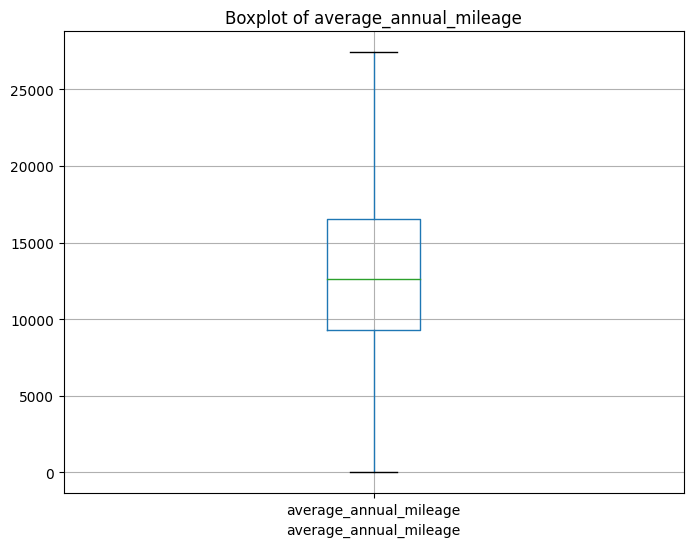

In [64]:
plot_new(df_final, 'average_annual_mileage', 'hist')
plot_new(df_final, 'average_annual_mileage', 'box')

In [69]:
df_final['average_annual_mileage'].describe()

count    43864.000000
mean     13102.145011
std       5534.407854
min          0.000000
25%       9324.350000
50%      12621.157143
75%      16559.656250
max      27411.600000
Name: average_annual_mileage, dtype: float64

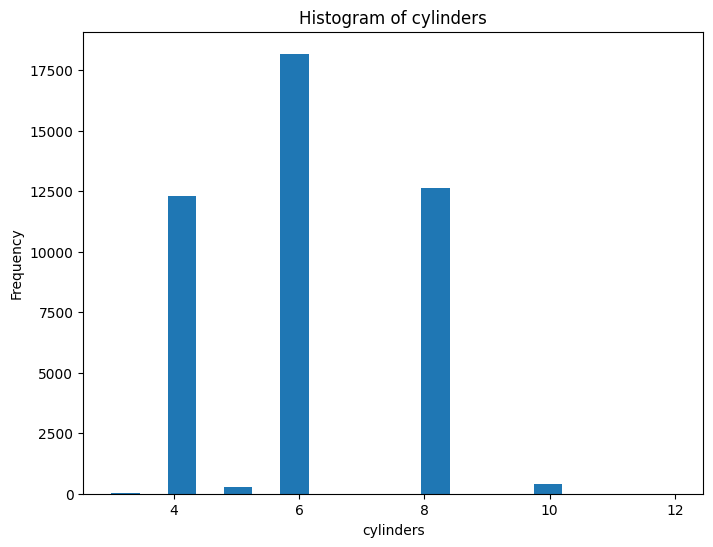

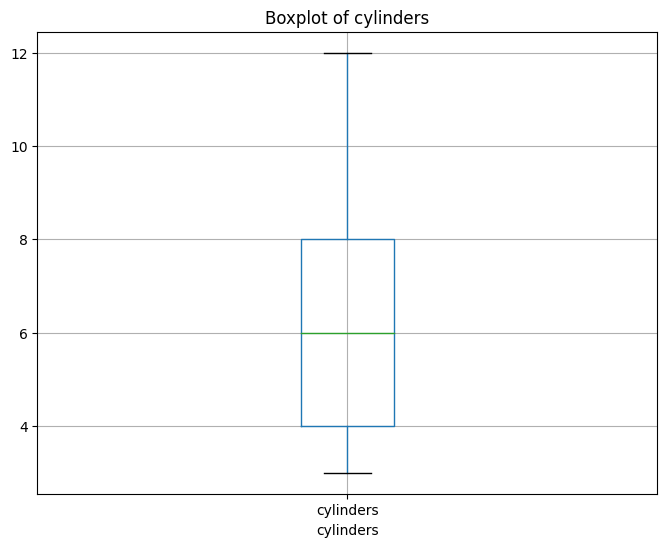

In [65]:
plot_new(df_final, 'cylinders', 'hist')
plot_new(df_final, 'cylinders', 'box')

In [70]:
df_final['cylinders'].describe()

count    43864.000000
mean         6.044912
std          1.562399
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

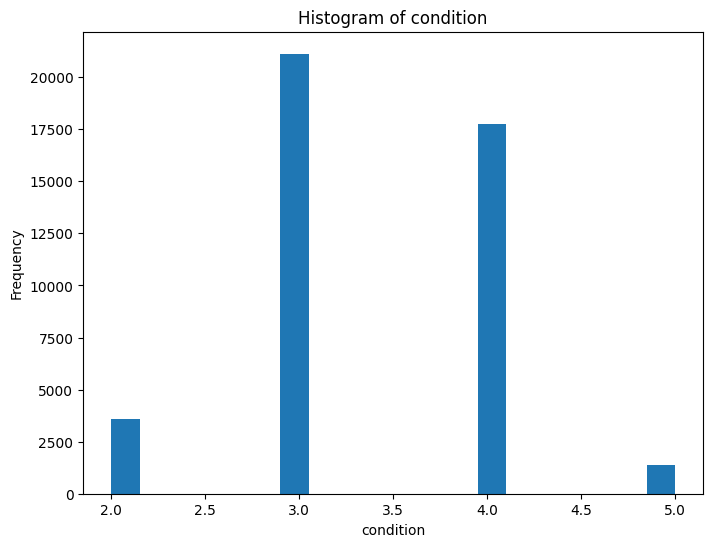

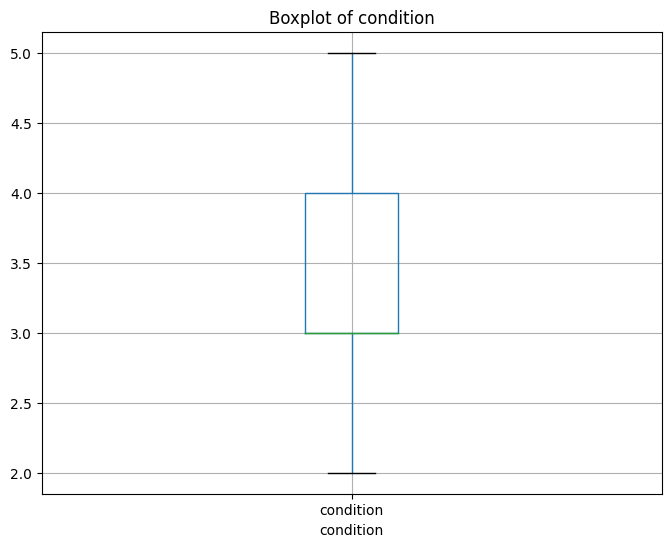

In [66]:
plot_new(df_final, 'condition', 'hist')
plot_new(df_final, 'condition', 'box')

In [71]:
df_final['condition'].describe()

count    43864.00000
mean         3.38592
std          0.68189
min          2.00000
25%          3.00000
50%          3.00000
75%          4.00000
max          5.00000
Name: condition, dtype: float64

In the findings above, there were no strange values ​​or any anomalies found.

## Ad Validity Period <a id='ad_valid_period'></a>

In [72]:
average_days_listed = df_final['days_listed'].mean()
median_days_listed = df_final['days_listed'].median()
max_days_listed = df_final['days_listed'].max()
min_days_listed = df_final['days_listed'].min()

print(f"Average ad duration: {average_days_listed:.2f} days")
print(f"Median ad duration: {median_days_listed} days")
print(f"Maximum ad duration: {max_days_listed} days")
print(f"Minimum ad duration: {min_days_listed} days")

Average ad duration: 39.54 days
Median ad duration: 33.0 days
Maximum ad duration: 271 days
Minimum ad duration: 0 days


Data shows that the average duration of vehicle advertising is around 39.55 days, with a median value of around 33 days. This shows that, in general, vehicle ads tend to run for several weeks before being removed or terminated. However, it should be noted that there are advertisements with very long validity periods, with a maximum duration of up to 271 days. Apart from that, there are some advertisements with a very short validity period (0 days).

## Average Price of Each Type of Vehicle <a id='avg_price_type'></a>

,ads,mean_price
type,,
sedan,10976,6638.087464
SUV,10972,9773.258932
truck,9820,13893.807637
pickup,5553,13578.113092
coupe,1875,13094.271467
wagon,1447,8659.360055
mini-van,1056,7516.025568
hatchback,933,6537.128617
van,527,8004.569260


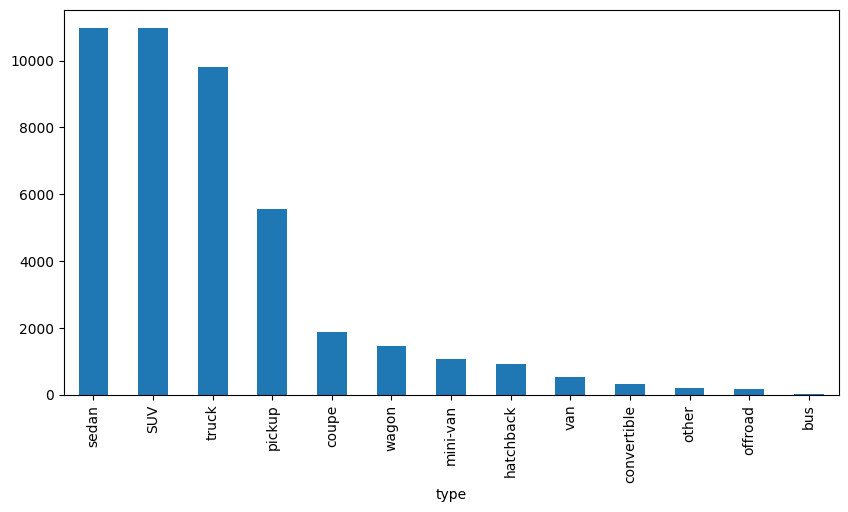

In [73]:
report = (df_final.groupby(['type']).agg({'model' : 'count', 'price': 'mean'})
         .rename(columns = {'model': 'ads', 'price': 'mean_price'})
         .sort_values(by = 'ads', ascending = False))
report.head(25)['ads'].plot(kind = 'bar', figsize = (10,5))
report

You can see the 25 most popular types of vehicles based on the number of advertisements. Sedans and SUVs are the most frequently advertised vehicle types, with more than 10,000 ads each. The highest average price is in the bus category, which is around 19,959, while the lowest average price is in the hatchback, which is around 6,537.

## Price Factor <a id='price_factors'></a>

In [74]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43864 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   43864 non-null  float64       
 1   model_year              43864 non-null  int32         
 2   model                   43864 non-null  object        
 3   condition               43864 non-null  int64         
 4   cylinders               43864 non-null  int32         
 5   fuel                    43864 non-null  object        
 6   odometer                43864 non-null  float64       
 7   transmission            43864 non-null  object        
 8   type                    43864 non-null  object        
 9   paint_color             43864 non-null  object        
 10  is_4wd                  43864 non-null  bool          
 11  date_posted             43864 non-null  datetime64[ns]
 12  days_listed             43864 non-null  int64      

### SUV <a id='suv_type'></a>

In [75]:
df_suv = df_final[df_final['type'] == 'SUV']

#### SUV Correlation Table <a id='suv_corr'></a>

In [76]:
columns = ['average_annual_mileage', 'vehicle_age', 'condition', 'price']
display(df_suv[columns].corr()[['price']].sort_values(by = 'price', ascending = False))

,price
price,1.000000
average_annual_mileage,0.148341
condition,-0.261827
vehicle_age,-0.566236


The most significant correlation is with vehicle age, indicating that the older the SUV, the lower the price. Additionally, vehicle condition also has a negative correlation with price, meaning vehicles in better condition tend to have higher prices. However, average annual mileage has a positive correlation with price, meaning SUVs with higher average annual mileage tend to have higher prices.

##### SUV - Transmission <a id='suv_corr_trans'></a>

In [77]:
display(df_suv.groupby('transmission').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model' : 'ads', 'price':'median_price'}))
        .sort_values(by = 'median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
transmission,,
manual,443,10950.0
automatic,10384,7997.0
other,145,7499.0


The results in the table above show that SUVs with manual transmissions have a higher median price than SUVs with automatic transmissions.

##### SUV - Paint Color <a id='suv_corr_col'></a>

In [78]:
display(df_suv.groupby('paint_color').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model' : 'ads', 'price':'median_price'}))
        .sort_values(by = 'median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
paint_color,,
orange,75,16900.0
black,1911,9995.0
white,1677,8995.0
unknown,1967,7999.0
grey,1032,7995.0
silver,1424,7995.0
custom,277,7898.0
red,825,7495.0
brown,346,6999.5


The results from the table above show the difference in median prices for SUVs with certain paint colors. Orange SUVs have the highest median price and are followed by black and white. SUVs with the unknown color 'unknown' also have a fairly high median price.

#### SUV Ploting <a id='suv_plot'></a>

##### Plot SUV Prices with Age <a id='suv_plot_age'></a>

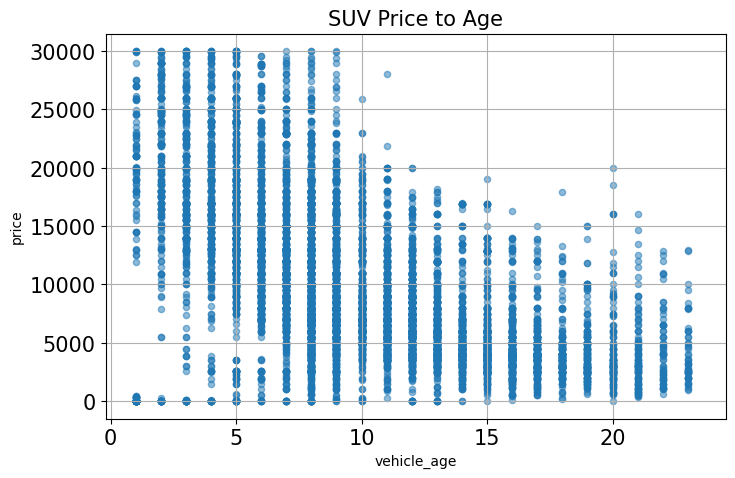

In [79]:
df_suv.plot(x = 'vehicle_age', y = 'price', kind = 'scatter', figsize = (8,5), grid = True, fontsize = 15, alpha = 0.5)
plt.title('SUV Price to Age', fontsize = 15)
plt.xlim(-0.2,24.5)
plt.show()

The graph shows that SUV prices tend to decrease with age. Newer SUVs have higher prices, and the downward price trend becomes more significant as the age of the vehicle increases.

##### Plot SUV Prices with Average Annual Mileage <a id='suv_plot_mil'></a>

Text(0.5, 1.0, 'SUV Price to Annual Mileage')

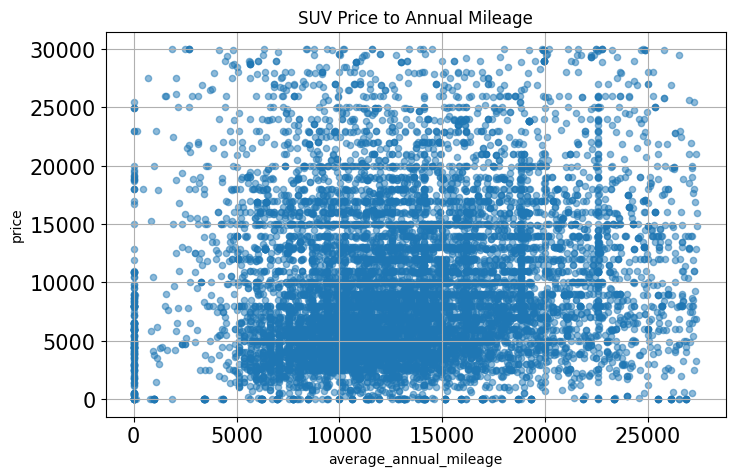

In [80]:
df_suv.reset_index().plot(x = 'average_annual_mileage', y = 'price', kind = 'scatter', figsize = (8,5), grid = True, fontsize= 15, alpha = 0.5)
plt.title('SUV Price to Annual Mileage')

There doesn't appear to be a strong linear relationship between SUV price and average annual mileage. SUV prices vary without any particular pattern in relation to average annual mileage.

##### Plot SUV prices with condition <a id='suv_plot_con'></a>

Text(0.5, 1.0, 'SUV Price to Condition')

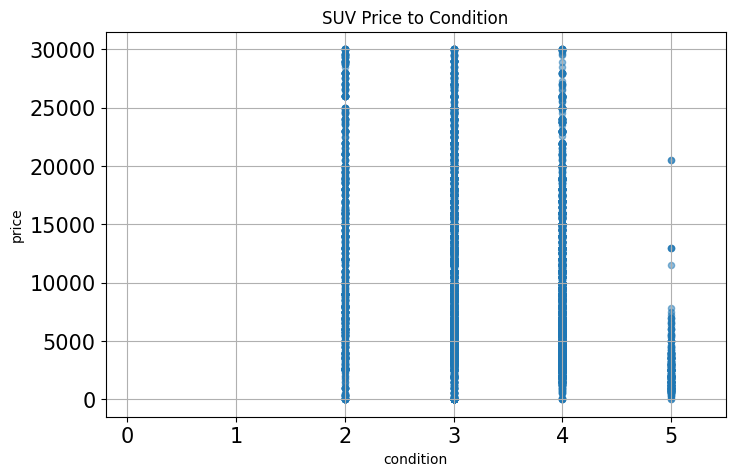

In [81]:
df_suv.plot(x = 'condition', y = 'price', kind = 'scatter', figsize = (8,5), grid = True, fontsize=15, alpha = 0.5)
plt.xlim(-0.2,5.5)
plt.title('SUV Price to Condition')

The graph shows that SUV prices are higher for vehicles in better condition. SUVs in higher condition fetch better prices in the market.

##### SUV Price Plot with Transmission <a id='suv_plot_trans'></a>

Text(0.5, 1.0, 'SUV Transmission to Price ')

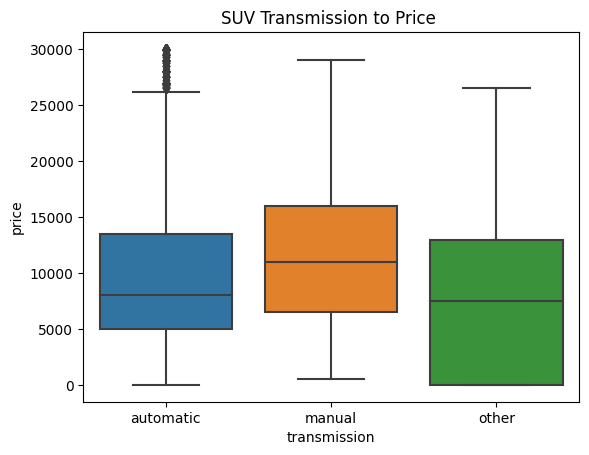

In [82]:
sns.boxplot(x = 'transmission', y = 'price', data = df_suv)
plt.title('SUV Transmission to Price ')

The boxplot results show that SUVs with manual transmission have a higher price range compared to those with automatic transmission. This can be important information for potential buyers who have certain transmission preferences.

##### Plot SUV Prices with Colors <a id='suv_plot_col'></a>

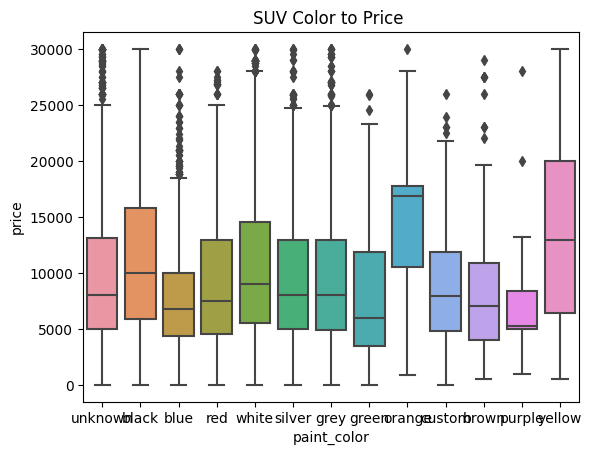

In [83]:
sns.boxplot(x = 'paint_color', y = 'price', data = df_suv)
plt.title('SUV Color to Price ')
plt.show()

This graph compares SUV prices based on paint color. Some colors, such as orange, black, and white, have higher prices than other colors. However, yellow has a middle value with a high price, although not as high as orange. The color of the vehicle can have an influence on the price in the market.

### Sedan <a id='sed_type'></a>

In [84]:
df_sedan = df_final[df_final['type'] == 'sedan']

#### Sedan Correlation Table <a id='sed_corr'></a>

In [85]:
columns = ['average_annual_mileage', 'vehicle_age', 'condition', 'price']
display(df_sedan[columns].corr()[['price']].sort_values(by = 'price', ascending = False))

,price
price,1.000000
average_annual_mileage,0.077811
condition,-0.293995
vehicle_age,-0.619305


In the table above, there is a strong negative correlation between vehicle age (vehicle_age) and vehicle price, which means the older the vehicle, the lower the price. Apart from that, condition also has a negative correlation with price. The better the condition of the vehicle, the higher the price. However, this correlation is not very strong.

##### Sedan - Transmission <a id='sed_corr_trans'></a>

In [86]:
display(df_sedan.groupby('transmission').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model' : 'ads', 'price':'median_price'}))
        .sort_values(by = 'median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
transmission,,
automatic,10317,5995.0
manual,548,4500.0
other,111,3995.0


The results in the sedan-transmission table above, show that automatic transmission is the more common choice for sedans, with a much higher number of advertisements. The median price of sedans with automatic transmissions is higher than those with manual or other transmissions.

##### Sedan - Paint Color <a id='sed_corr_col'></a>

In [87]:
display(df_sedan.groupby('paint_color').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model' : 'ads', 'price':'median_price'}))
        .sort_values(by = 'median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
paint_color,,
black,1573,6500.0
white,1334,6495.0
grey,1470,5995.0
red,873,5900.0
unknown,1971,5900.0
silver,1856,5707.0
blue,1144,5500.0
custom,262,5200.0
brown,242,4225.0


In the table above, it can be seen that the vehicle paint color also affects the price of the sedan. Black, white, and gray have higher median prices than other colors.

#### Sedan Ploting <a id='sed_plot'></a>

##### Plot of Sedan Prices with Age <a id='sed_plot_age'></a>

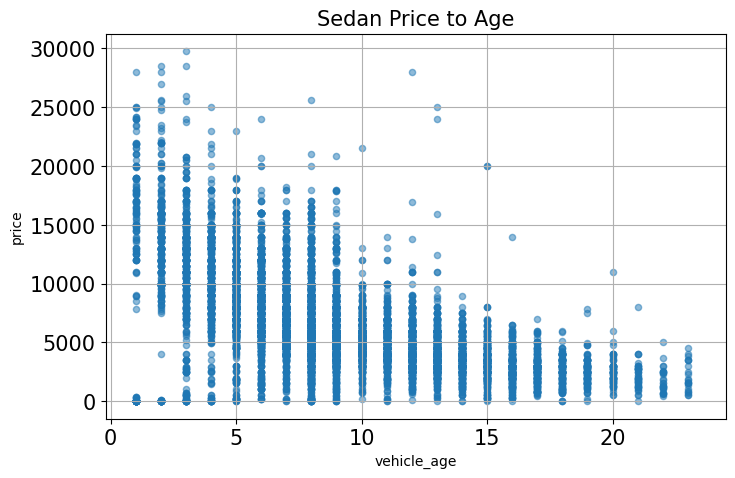

In [88]:
df_sedan.plot(x = 'vehicle_age', y = 'price', kind = 'scatter', figsize = (8,5), grid = True, fontsize = 15, alpha = 0.5)
plt.title('Sedan Price to Age', fontsize = 15)
plt.xlim(-0.2,24.5)
plt.show()

From the scatter plot above, it can be seen that sedan prices tend to decrease as the vehicle ages. The older the vehicle, the lower the price offered.

##### Plot Sedan Prices with Average Annual Mileage <a id='sed_plot_mil'></a>

Text(0.5, 1.0, 'Sedan Price to Annual Mileage')

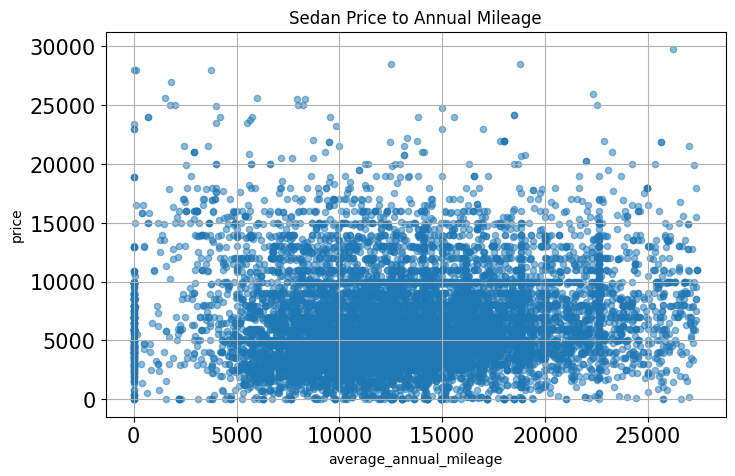

In [89]:
df_sedan.reset_index().plot(x = 'average_annual_mileage', y = 'price', kind = 'scatter', figsize = (8,5), grid = True, fontsize= 15, alpha = 0.5)
plt.title('Sedan Price to Annual Mileage')

In the scatter plot above, it appears that there is no strong trend between the average annual mileage and sedan prices. This may be due to variations in vehicle use.

##### Plot Sedan Prices with condition <a id='sed_plot_con'></a>

Text(0.5, 1.0, 'Sedan Price to Condition')

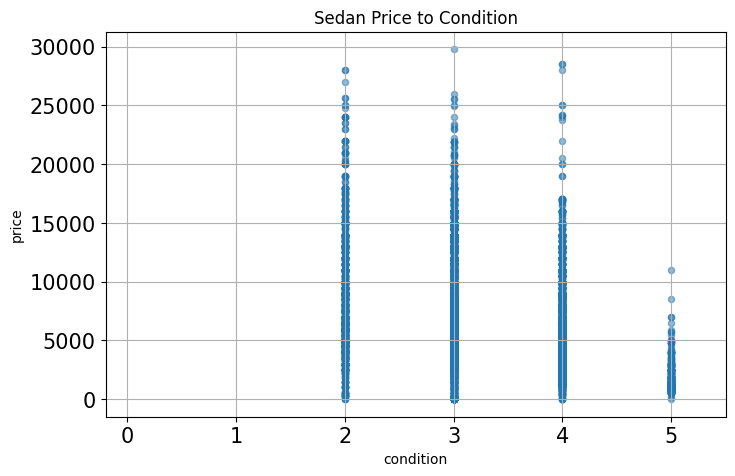

In [90]:
df_sedan.plot(x = 'condition', y = 'price', kind = 'scatter', figsize = (8,5), grid = True, fontsize=15, alpha = 0.5)
plt.xlim(-0.2,5.5)
plt.title('Sedan Price to Condition')

In the scatter plot for sedan prices with condition, there is a negative relationship between condition and sedan prices. The better the condition of the vehicle, the higher the price offered.

##### Sedan Price Plot with Transmission <a id='sed_plot_trans'></a>

Text(0.5, 1.0, 'Sedan Transmission to Price ')

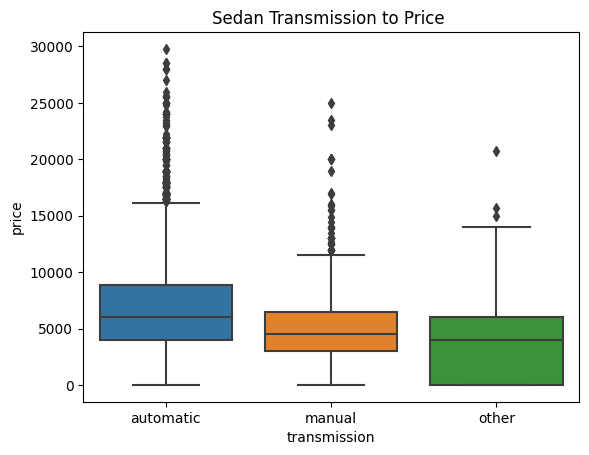

In [91]:
sns.boxplot(x = 'transmission', y = 'price', data = df_sedan)
plt.title('Sedan Transmission to Price ')

In the boxplot above, sedan-type vehicles with automatic transmission generally have higher prices than those using manual transmission or other types of transmission.

##### Sedan Price Plot with Color <a id='sed_plot_col'></a>

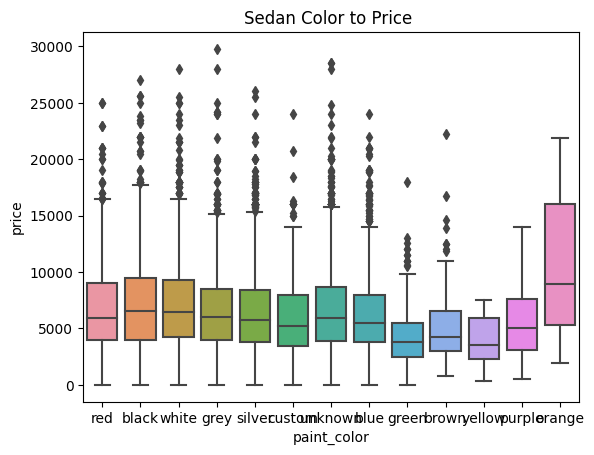

In [92]:
sns.boxplot(x = 'paint_color', y = 'price', data = df_sedan)
plt.title('Sedan Color to Price ')
plt.show()

In the boxplot above, vehicle paint color also affects the price of the sedan. Sedans in orange, black and white have a higher median price than the others. However, there is a large distribution of outliers for several colors, such as colors in the 'unknown' category.

## Conclusion <a id='final_conclu'></a>

The initial analysis process begins with importing the dataset that will be used. Next, initial data exploration is carried out to understand its structure, check data types, and review existing columns. This initial step also includes data cleaning, such as identifying and dealing with missing values, as well as checking and adjusting data types to suit the analysis to be carried out. Some columns such as 'is_4wd', 'paint_color', 'odometer', 'cylinders', and 'model_year' receive more attention.

The next stage is handling missing values ​​in several columns. For example, missing values ​​in 'is_4wd' and 'paint_color' are filled with more relevant values. In addition, some columns have had their data types changed to suit analysis needs, such as changing 'is_4wd' to a boolean data type. At this stage, new variables are also introduced that have relevance to the analysis, such as the year the vehicle was posted ('year_posted'), vehicle age ('vehicle_age'), and average annual mileage ('average_annual_mileage'). Additionally, the 'condition' column is converted to numeric format to simplify analysis.

The data then undergoes an outlier handling process using the whisker method on important columns such as 'price', 'vehicle_age', 'average_annual_mileage', 'cylinders', and 'condition'. This helps clean the data from extreme values ​​that could potentially influence the analysis results. The next focus is key parameters, such as price ('price'), vehicle age ('vehicle_age'), average annual mileage ('average_annual_mileage'), number of cylinders ('cylinders'), and condition ('condition' ). Analysis involves understanding the distribution of data, the average value, as well as the variability of each parameter, which becomes the basis for further analysis.

Data analysis continues with an understanding of ad duration, which includes the average, median, and maximum and minimum values ​​in the 'days_listed' column. Ad length gives an idea of ​​how long a vehicle is typically advertised before it sells, while a comparison between SUVs and sedans reveals significant differences. In terms of price, SUVs have a higher average price, around 9,773, compared to sedans which have an average price of around 6,638. Another difference can be seen in the age of the vehicles, with sedans and SUVs having almost the same average age. However, sedans tend to have a higher average annual mileage, around 13,214, compared to SUVs at around 9,000. This analysis also reveals differences in vehicle condition, transmission type, and color, providing useful insights for potential buyers or sellers to identify market trends and make better decisions regarding the vehicle they want to buy or sell.